In [1]:
import torch
from torchvision import datasets, transforms

# Download MNIST dataset using PyTorch
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

# Access the data
x_train = train_dataset.data
y_train = train_dataset.targets
x_test = test_dataset.data
y_test = test_dataset.targets

# Print basic information about the dataset
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"Sample pixel value range: {x_train.min().item()} to {x_train.max().item()}")

Training data shape: torch.Size([60000, 28, 28])
Training labels shape: torch.Size([60000])
Test data shape: torch.Size([10000, 28, 28])
Test labels shape: torch.Size([10000])
Sample pixel value range: 0 to 255


In [2]:
# Flatten the images from 28x28 to 784 features
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Normalize pixel values to range [0,1]
x_train_normalized = x_train_flat.float() / 255.0
x_test_normalized = x_test_flat.float() / 255.0

# Print shapes and value ranges to verify
print(f"Flattened training data shape: {x_train_normalized.shape}")
print(f"Flattened test data shape: {x_test_normalized.shape}")
print(f"Normalized pixel value range: {x_train_normalized.min().item()} to {x_train_normalized.max().item()}")

Flattened training data shape: torch.Size([60000, 784])
Flattened test data shape: torch.Size([10000, 784])
Normalized pixel value range: 0.0 to 1.0


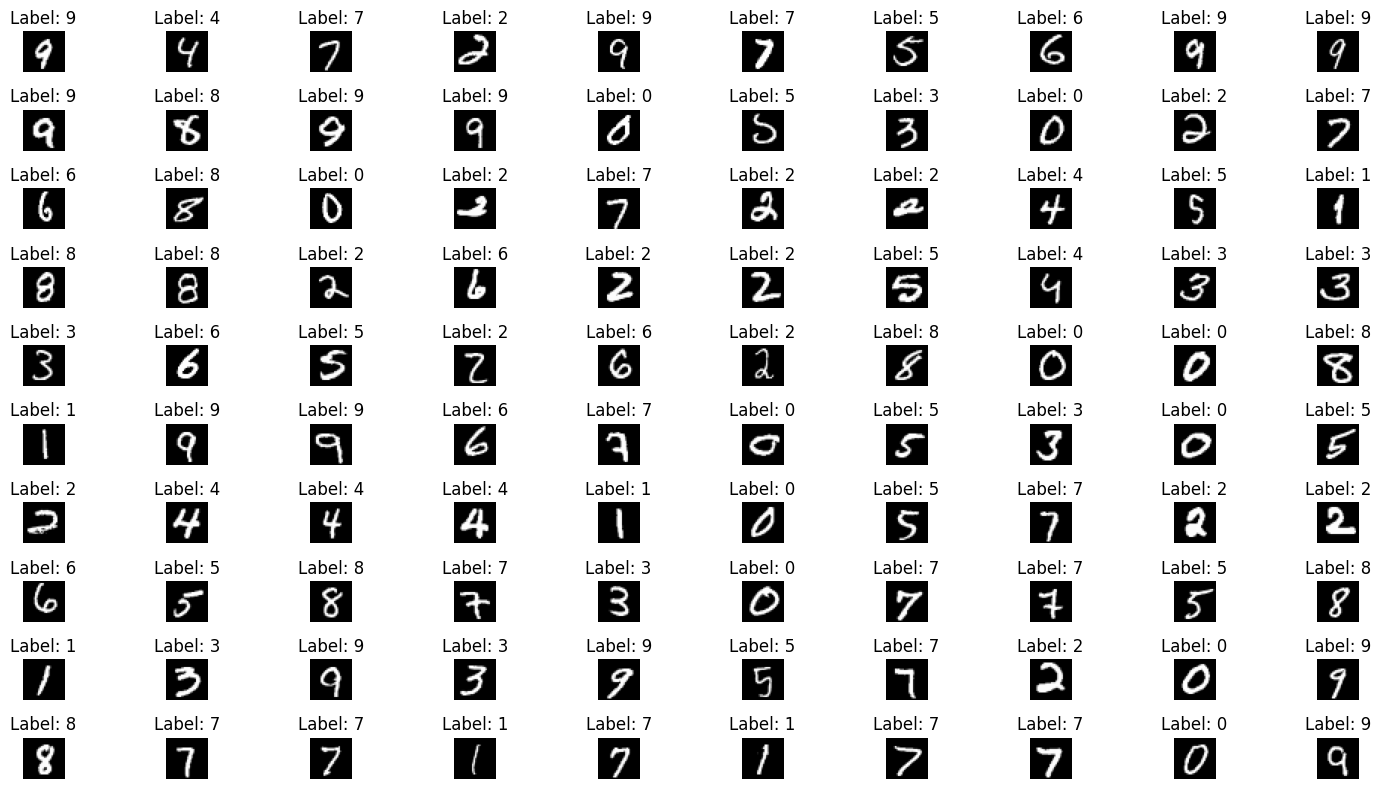

In [3]:
import random

import matplotlib.pyplot as plt

# Set seed for reproducibility
random.seed(42)

# Number of images to display
num_images = 100
num_image_per_row = 10
# Get random indices
random_indices = random.sample(range(len(x_train)), num_images)

# Create a grid of subplots (10 rows for 100 images)
fig, axes = plt.subplots(num_images // num_image_per_row, num_image_per_row, figsize=(15, 8))
axes = axes.flatten()

# Plot each image
for i, idx in enumerate(random_indices):
    # Get the image and its label
    img = x_train[idx]
    label = y_train[idx].item()
    
    # Display the image
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

# Split the normalized training data into training and validation sets
# Use a 80/20 split, with 20% for validation
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train_normalized, 
    y_train, 
    test_size=0.2, 
    random_state=42,  # Use the same random seed for reproducibility
    stratify=y_train  # Ensure the split maintains the proportion of each class
)

# Print the shapes of the resulting datasets
print(f"Training data shape after split: {x_train_split.shape}")
print(f"Training labels shape after split: {y_train_split.shape}")
print(f"Validation data shape: {x_val_split.shape}")
print(f"Validation labels shape: {y_val_split.shape}")

Training data shape after split: torch.Size([48000, 784])
Training labels shape after split: torch.Size([48000])
Validation data shape: torch.Size([12000, 784])
Validation labels shape: torch.Size([12000])


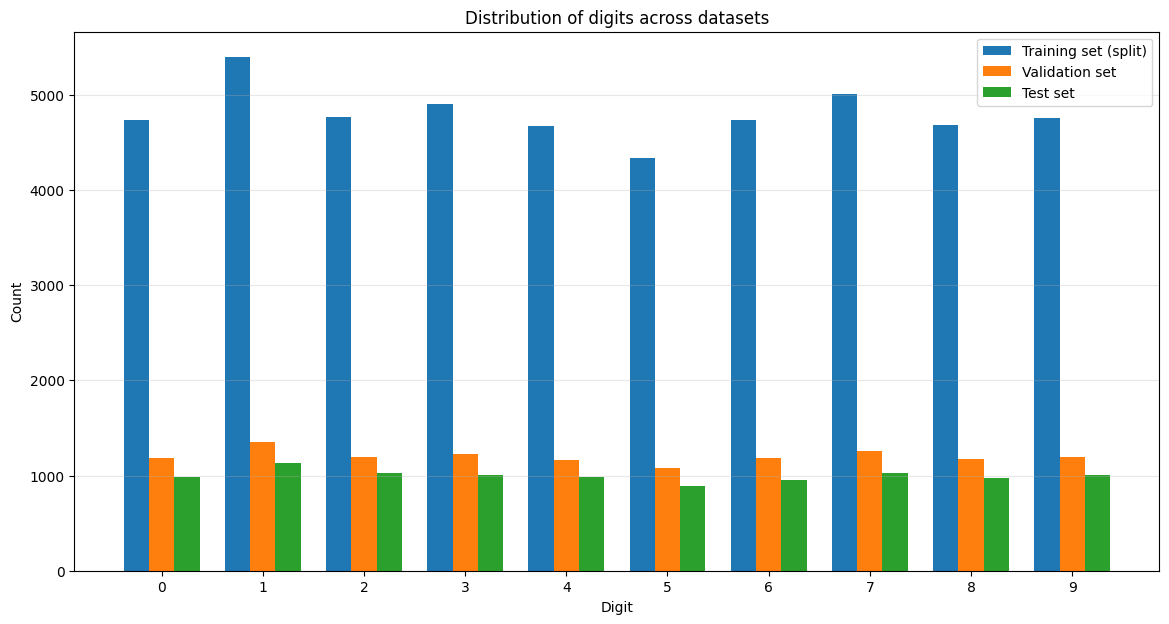

Split Training set counts: [4738, 5394, 4766, 4905, 4674, 4337, 4734, 5012, 4681, 4759]
Percentage of each digit in split training set: [9.87, 11.24, 9.93, 10.22, 9.74, 9.04, 9.86, 10.44, 9.75, 9.91]%

Validation set counts: [1185, 1348, 1192, 1226, 1168, 1084, 1184, 1253, 1170, 1190]
Percentage of each digit in validation set: [9.88, 11.23, 9.93, 10.22, 9.73, 9.03, 9.87, 10.44, 9.75, 9.92]%

Test set counts: [980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]
Percentage of each digit in test set: [9.8, 11.35, 10.32, 10.1, 9.82, 8.92, 9.58, 10.28, 9.74, 10.09]%

Total counts across Train(split)/Val/Test: [6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]
Total percentage across Train(split)/Val/Test: [9.86, 11.25, 9.99, 10.2, 9.75, 9.02, 9.82, 10.42, 9.75, 9.94]%


In [5]:
# Count instances of each digit (0-9) in the training, validation, and test sets
train_split_counts = torch.bincount(y_train_split)
val_split_counts = torch.bincount(y_val_split)
test_counts = torch.bincount(y_test) # Already calculated in the original code, but recalculating for clarity

# Create a figure for the plot
plt.figure(figsize=(14, 7))

# Set width of bars
bar_width = 0.25
index = torch.arange(10)

# Create the bars
plt.bar(index - bar_width, train_split_counts, bar_width, label='Training set (split)')
plt.bar(index, val_split_counts, bar_width, label='Validation set')
plt.bar(index + bar_width, test_counts, bar_width, label='Test set')

# Add labels and title
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Distribution of digits across datasets')
plt.xticks(index, range(10))
plt.legend()

# Display the plot
plt.grid(axis='y', alpha=0.3)
plt.show()

# Print exact counts and percentages
print("Split Training set counts:", train_split_counts.tolist())
print(f"Percentage of each digit in split training set: {[round(p.item() * 100, 2) for p in (train_split_counts / train_split_counts.sum())]}%")
print("\nValidation set counts:", val_split_counts.tolist())
print(f"Percentage of each digit in validation set: {[round(p.item() * 100, 2) for p in (val_split_counts / val_split_counts.sum())]}%")
print("\nTest set counts:", test_counts.tolist())
print(f"Percentage of each digit in test set: {[round(p.item() * 100, 2) for p in (test_counts / test_counts.sum())]}%")

# Calculate and print total counts across all three sets
total_counts_all = train_split_counts + val_split_counts + test_counts
print("\nTotal counts across Train(split)/Val/Test:", total_counts_all.tolist())
print(f"Total percentage across Train(split)/Val/Test: {[round(p.item() * 100, 2) for p in (total_counts_all / total_counts_all.sum())]}%")



In [35]:
import torch.nn as nn
import torch.nn.functional as F



# Model 1: Shallow network
class ShallowModel(nn.Module):
    def __init__(self):
        super(ShallowModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 64)  # Input is 28x28 = 784 features
        self.relu1 = nn.ReLU()           # Define ReLU layer
        self.fc2 = nn.Linear(64, 10)     # Output is 10 classes (digits 0-9)
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x) # Use ReLU layer
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Model 2: Deeper network
class DeeperModel(nn.Module):
    def __init__(self):
        super(DeeperModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128) # Corrected layer definition
        self.relu1 = nn.ReLU()           # Define ReLU layer
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()           # Define ReLU layer
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x) # Use ReLU layer
        x = self.fc2(x)
        x = self.relu2(x) # Use ReLU layer
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

# Model 3: Wider network
class WiderModel(nn.Module):
    def __init__(self):
        super(WiderModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 256)
        self.relu1 = nn.ReLU()           # Define ReLU layer
        self.fc2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()           # Define ReLU layer
        self.fc3 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x) # Use ReLU layer
        x = self.fc2(x)
        x = self.relu2(x) # Use ReLU layer
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)


# Model 4: Custom CNN model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)
        
        # Dropout for regularization
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        # Input needs to be properly shaped for CNN [batch_size, channels, height, width]
        if x.dim() == 3:  # If the input is [batch_size, height, width]
            x = x.unsqueeze(1)  # Add channel dimension [batch_size, 1, height, width]
        elif x.dim() == 2:  # If input is already flattened
            x = x.view(-1, 1, 28, 28)  # Reshape to [batch_size, 1, height, width]
            
        # Apply convolutions
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        # Flatten for fully connected layers
        x = x.view(-1, 64 * 7 * 7)
        
        # Fully connected layers with ReLU and dropout
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)



class WiderDeeperModel(nn.Module):
    def __init__(self):
        super(WiderDeeperModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 384)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(384, 256)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(256, 128)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(128, 64)
        self.relu5 = nn.ReLU()
        self.fc6 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        x = self.relu4(x)
        x = self.fc5(x)
        x = self.relu5(x)
        x = self.fc6(x)
        return F.log_softmax(x, dim=1)



# Model: Big MLP model (~1M parameters)
class BigMLPModel(nn.Module):
    def __init__(self):
        super(BigMLPModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 1024)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(1024, 128)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(128, 64)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(64, 10)
        # Consider adding dropout for regularization
        # self.dropout = nn.Dropout(0.3) 

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        # x = self.dropout(x) 
        x = F.relu(self.fc2(x))
        # x = self.dropout(x) 
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

# Model: Very Big MLP model (~3M parameters)
class VeryBigMLPModel(nn.Module):
    def __init__(self):
        super(VeryBigMLPModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 1500)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(1500, 1024)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(1024, 256)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(256, 128)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(128, 10)
        # Consider adding dropout for regularization
        # self.dropout = nn.Dropout(0.4) 

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        # x = self.dropout(x) 
        x = F.relu(self.fc2(x))
        # x = self.dropout(x) 
        x = F.relu(self.fc3(x))
        # x = self.dropout(x) 
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x, dim=1)


# Model 5: Small CNN model (~200k parameters)
class SmallCNNModel(nn.Module):
    def __init__(self):
        super(SmallCNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        # After two pooling layers (28 -> 14 -> 7), the feature map size is 7x7
        # The number of channels is 64
        self.fc1 = nn.Linear(64 * 7 * 7, 64) 
        self.fc2 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        if x.dim() == 3:
            x = x.unsqueeze(1)
        elif x.dim() == 2:
            x = x.view(-1, 1, 28, 28)
            
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        x = x.view(-1, 64 * 7 * 7) # Flatten
        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return F.log_softmax(x, dim=1)

# Model 6: Big CNN model (~1M parameters)
class BigCNNModel(nn.Module):
    def __init__(self):
        super(BigCNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        # After two pooling layers (28 -> 14 -> 7), the feature map size is 7x7
        # The number of channels is 128
        self.fc1 = nn.Linear(128 * 7 * 7, 150) # Adjusted to get closer to 1M params
        self.fc2 = nn.Linear(150, 64)
        self.fc3 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.3) # Slightly increased dropout for larger model

    def forward(self, x):
        if x.dim() == 3:
            x = x.unsqueeze(1)
        elif x.dim() == 2:
                x = x.view(-1, 1, 28, 28)
                
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        x = x.view(-1, 128 * 7 * 7) # Flatten
        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x) # Add dropout after second FC layer as well
        x = self.fc3(x)
        
        return F.log_softmax(x, dim=1)

# Model 7: Very Big CNN model (~3M parameters) - Renamed from BasicModel for clarity
class VeryBigCNNModel(nn.Module):
    def __init__(self):
        super(VeryBigCNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        # After two pooling layers (28 -> 14 -> 7), the feature map size is 7x7
        # The number of channels is 256
        self.fc1 = nn.Linear(256 * 7 * 7, 256) 
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.4) # Increased dropout for very large model

    def forward(self, x):
        if x.dim() == 3:
            x = x.unsqueeze(1)
        elif x.dim() == 2:
                x = x.view(-1, 1, 28, 28)
                
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        x = x.view(-1, 256 * 7 * 7) # Flatten
        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        
        return F.log_softmax(x, dim=1)













In [36]:
from torchsummary import summary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Initialize all the model variants
shallow_model = ShallowModel().to(device)
deeper_model = DeeperModel().to(device)
wider_model = WiderModel().to(device)
cnn_model = CNNModel().to(device)
wider_deeper_model = WiderDeeperModel().to(device)
big_mlp_model = BigMLPModel().to(device)
very_big_mlp_model = VeryBigMLPModel().to(device)
small_cnn_model = SmallCNNModel().to(device)
big_cnn_model = BigCNNModel().to(device)
very_big_cnn_model = VeryBigCNNModel().to(device)

# Print model summaries - grouped by type (MLP vs CNN)
print("\n" + "="*50)
print("MLP MODEL ARCHITECTURES")
print("="*50)

print("\nShallow MLP Model:")
summary(shallow_model, input_size=mlp_input_size, device=str(device))

print("\nDeeper MLP Model:")
summary(deeper_model, input_size=mlp_input_size, device=str(device))

print("\nWider MLP Model:")
summary(wider_model, input_size=mlp_input_size, device=str(device))

print("\nWider-Deeper MLP Model:")
summary(wider_deeper_model, input_size=mlp_input_size, device=str(device))

print("\nBig MLP Model (~1M parameters):")
summary(big_mlp_model, input_size=mlp_input_size, device=str(device))

print("\nVery Big MLP Model (~3M parameters):")
summary(very_big_mlp_model, input_size=mlp_input_size, device=str(device))

print("\n" + "="*50)
print("CNN MODEL ARCHITECTURES")
print("="*50)

print("\nCNN Model (Base):")
summary(cnn_model, input_size=cnn_input_size, device=str(device))

print("\nSmall CNN Model (~200k parameters):")
summary(small_cnn_model, input_size=cnn_input_size, device=str(device))

print("\nBig CNN Model (~1M parameters):")
summary(big_cnn_model, input_size=cnn_input_size, device=str(device))

print("\nVery Big CNN Model (~3M parameters):")
summary(very_big_cnn_model, input_size=cnn_input_size, device=str(device))

# Create a table showing parameter counts for each model
print("\n" + "="*50)
print("MODEL PARAMETER COMPARISON")
print("="*50)
print(f"{'Model Name':<20} {'Parameters':<12} {'Type':<10}")
print("-"*45)

for name, model in {
    'Shallow MLP': shallow_model,
    'Deeper MLP': deeper_model,
    'Wider MLP': wider_model,
    'Wider-Deeper MLP': wider_deeper_model,
    'Big MLP': big_mlp_model,
    'Very Big MLP': very_big_mlp_model,
    'Base CNN': cnn_model,
    'Small CNN': small_cnn_model,
    'Big CNN': big_cnn_model,
    'Very Big CNN': very_big_cnn_model
}.items():
    params = sum(p.numel() for p in model.parameters())
    model_type = "CNN" if "CNN" in name else "MLP"
    print(f"{name:<20} {params:<12,d} {model_type:<10}")






mlp_input_size = (784,) 
cnn_input_size = (1, 28, 28)




MLP MODEL ARCHITECTURES

Shallow MLP Model:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                   [-1, 64]          50,240
              ReLU-3                   [-1, 64]               0
            Linear-4                   [-1, 10]             650
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.19
Estimated Total Size (MB): 0.20
----------------------------------------------------------------

Deeper MLP Model:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 

In [37]:
import torch


# Move data splits to the selected device
x_train_split = x_train_split.to(device)
y_train_split = y_train_split.to(device)
x_val_split = x_val_split.to(device)
y_val_split = y_val_split.to(device)
x_test_normalized = x_test_normalized.to(device)
y_test = y_test.to(device)

# Verify one of the tensors is on the correct device
print(f"Device of x_train_split: {x_train_split.device}")
print(f"Device of y_train_split: {y_train_split.device}")


Device of x_train_split: cuda:0
Device of y_train_split: cuda:0


In [38]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import numpy as np
import time
import tqdm
import torch
import random
# Create DataLoaders for batch processing
def create_dataloaders(x_train, y_train, x_val, y_val, x_test, y_test, batch_size=64):
    # Create dataset objects
    train_dataset = TensorDataset(x_train, y_train)
    val_dataset = TensorDataset(x_val, y_val)
    test_dataset = TensorDataset(x_test, y_test)
    
    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    return train_loader, val_loader, test_loader

# Function to train model
def train_model(model, optimizer, train_loader, val_loader, epochs=10, device=None, patience=10):
    # Set device if not provided
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Loss function
    criterion = nn.CrossEntropyLoss()
    
    # For tracking metrics
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': [],
        'epoch_time': []
    }
    
    # For early stopping
    best_val_loss = float('inf')
    best_model_state = None
    counter = 0
    
    for epoch in range(epochs):
        start_time = time.time()
        
        # Training
        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0
        
        # Use tqdm for progress tracking
        train_pbar = tqdm.tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs} [Train]')
        for inputs, targets in train_pbar:
            inputs, targets = inputs.to(device), targets.to(device)
            
            # Zero the parameter gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            # Track statistics
            train_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total_train += targets.size(0)
            correct_train += (predicted == targets).sum().item()
            
            # Update progress bar
            train_pbar.set_postfix({'loss': loss.item(), 'acc': correct_train/total_train})
        
        # Calculate average training loss and accuracy
        train_loss = train_loss / total_train
        train_acc = correct_train / total_train
        
        # Validation
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        
        val_pbar = tqdm.tqdm(val_loader, desc=f'Epoch {epoch+1}/{epochs} [Val]')
        with torch.no_grad():
            for inputs, targets in val_pbar:
                inputs, targets = inputs.to(device), targets.to(device)
                
                # Forward pass
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                
                # Track statistics
                val_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs.data, 1)
                total_val += targets.size(0)
                correct_val += (predicted == targets).sum().item()
                
                # Update progress bar
                val_pbar.set_postfix({'loss': loss.item(), 'acc': correct_val/total_val})
        
        # Calculate average validation loss and accuracy
        val_loss = val_loss / total_val
        val_acc = correct_val / total_val
        
        # Measure epoch time
        epoch_time = time.time() - start_time
        
        # Save metrics
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['epoch_time'].append(epoch_time)
        
        # Print progress
        print(f'Epoch {epoch+1}/{epochs} - {epoch_time:.2f}s - '
              f'train_loss: {train_loss:.4f} - train_acc: {train_acc:.4f} - '
              f'val_loss: {val_loss:.4f} - val_acc: {val_acc:.4f}')
        
        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = model.state_dict().copy()
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print(f'Early stopping triggered after {epoch+1} epochs')
                break
    
    # Load the best model state if early stopping occurred
    if best_model_state is not None and counter >= patience:
        model.load_state_dict(best_model_state)
        print(f'Loaded best model with validation loss: {best_val_loss:.4f}')
    
    return history, model

# Function to evaluate on test data
def evaluate_model(model, test_loader, device=None):
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    model.eval()
    criterion = nn.CrossEntropyLoss()
    test_loss = 0.0
    correct = 0
    total = 0
    
    # For confusion matrix and per-class metrics
    all_preds = []
    all_targets = []
    
    test_pbar = tqdm.tqdm(test_loader, desc='Evaluating')
    with torch.no_grad():
        for inputs, targets in test_pbar:
            inputs, targets = inputs.to(device), targets.to(device)
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            # Track statistics
            test_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
            
            # Store predictions and targets for metrics
            all_preds.extend(predicted.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())
            
            # Update progress bar
            test_pbar.set_postfix({'loss': loss.item(), 'acc': correct/total})
    
    # Calculate final metrics
    test_loss = test_loss / total
    test_acc = correct / total
    
    # Calculate confusion matrix
    cm = confusion_matrix(all_targets, all_preds)
    
    # Calculate per-class metrics
    precision, recall, f1, support = precision_recall_fscore_support(
        all_targets, all_preds, average=None)
    
    # Calculate per-class accuracy
    class_correct = np.diag(cm)
    class_total = np.sum(cm, axis=1)
    class_acc = class_correct / class_total
    
    print(f'Test Loss: {test_loss:.4f} - Test Accuracy: {test_acc:.4f}')
    
    # Print per-class metrics
    print("\nClass-wise metrics:")
    for i in range(len(class_acc)):
        print(f"Class {i}: Accuracy={class_acc[i]:.4f}, Precision={precision[i]:.4f}, "
              f"Recall={recall[i]:.4f}, F1-Score={f1[i]:.4f}")
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_acc))
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    # Add text annotations to the confusion matrix
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.show()
    
    return test_loss, test_acc, class_acc, precision, recall, f1, cm



# Define hyperparameters
learning_rate = 0.001
epochs = 100
batch_size = 64
model_results = {}


In [39]:
from torch import optim
import torch.nn as nn
import torch.nn.functional as F
import torch

def train_and_evaluate_model(model, model_name, learning_rate, epochs=100, batch_size=64, device=None):
    """
    Train and evaluate a model with a standardized pipeline.
    
    Args:
        model: The PyTorch model to train
        model_name: Name of the model for recording results
        learning_rate: Learning rate for the optimizer
        epochs: Maximum number of training epochs
        batch_size: Batch size for training
        device: Device to train on (cpu/cuda)
    
    Returns:
        Trained model and training history
    """
    # Create DataLoaders
    train_loader, val_loader, test_loader = create_dataloaders(
        x_train_split, y_train_split, 
        x_val_split, y_val_split, 
        x_test_normalized, y_test, 
        batch_size=batch_size
    )
    
    # Define the optimizer
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Train the model
    print(f"Training {model_name} Model...")
    history, trained_model = train_model(
        model, 
        optimizer, 
        train_loader, 
        val_loader, 
        epochs=epochs, 
        device=device
    )
    
    # # Plot training history
    # plt.figure(figsize=(12, 5))
    
    # # Plot training & validation accuracy values
    # plt.subplot(1, 2, 1)
    # plt.plot(history['train_acc'], label='Train Accuracy')
    # plt.plot(history['val_acc'], label='Validation Accuracy')
    # plt.title(f'{model_name} Model Accuracy')
    # plt.xlabel('Epoch')
    # plt.ylabel('Accuracy')
    # plt.legend(loc='lower right')
    # plt.grid(True)
    
    # # Plot training & validation loss values
    # plt.subplot(1, 2, 2)
    # plt.plot(history['train_loss'], label='Train Loss')
    # plt.plot(history['val_loss'], label='Validation Loss')
    # plt.title(f'{model_name} Model Loss')
    # plt.xlabel('Epoch')
    # plt.ylabel('Loss')
    # plt.legend(loc='upper right')
    # plt.grid(True)
    
    # plt.tight_layout()
    # plt.show()
    
    print(f"\n{model_name} Model Training Complete.")
    
    # Evaluate the model on the test set
    print(f"\nEvaluating {model_name} Model on Test Set...")
    test_loss, test_acc, class_acc, precision, recall, f1, cm = evaluate_model(
        trained_model, 
        test_loader, 
        device=device
    )
    
    # Store results for comparison
    model_results[model_name] = {
        'history': history,
        'test_loss': test_loss,
        'test_acc': test_acc,
        'class_acc': class_acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'cm': cm,
        'model': trained_model
    }
    
    # Save the trained model
    model_file = f"{model_name.lower()}_model.pth"
    torch.save(trained_model.state_dict(), model_file)
    print(f"{model_name} model saved to {model_file}")
    
    return history, trained_model



Training Shallow Model...


Epoch 1/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 406.66it/s, loss=0.11, acc=0.926] 


Epoch 1/100 - 2.45s - train_loss: 0.4296 - train_acc: 0.8849 - val_loss: 0.2587 - val_acc: 0.9265


Epoch 2/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 288.88it/s, loss=0.0908, acc=0.944]


Epoch 2/100 - 2.64s - train_loss: 0.2201 - train_acc: 0.9376 - val_loss: 0.1970 - val_acc: 0.9442


Epoch 3/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 744.29it/s, loss=0.076, acc=0.954] 


Epoch 3/100 - 2.53s - train_loss: 0.1654 - train_acc: 0.9524 - val_loss: 0.1633 - val_acc: 0.9537


Epoch 4/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 589.79it/s, loss=0.0545, acc=0.958]


Epoch 4/100 - 2.55s - train_loss: 0.1333 - train_acc: 0.9622 - val_loss: 0.1445 - val_acc: 0.9576


Epoch 5/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 387.74it/s, loss=0.032, acc=0.962] 


Epoch 5/100 - 2.63s - train_loss: 0.1109 - train_acc: 0.9686 - val_loss: 0.1279 - val_acc: 0.9624


Epoch 6/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 656.52it/s, loss=0.0566, acc=0.965]


Epoch 6/100 - 2.61s - train_loss: 0.0933 - train_acc: 0.9737 - val_loss: 0.1222 - val_acc: 0.9647


Epoch 7/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 668.10it/s, loss=0.064, acc=0.967] 


Epoch 7/100 - 2.52s - train_loss: 0.0815 - train_acc: 0.9769 - val_loss: 0.1127 - val_acc: 0.9674


Epoch 8/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 345.74it/s, loss=0.0165, acc=0.967]


Epoch 8/100 - 3.00s - train_loss: 0.0704 - train_acc: 0.9796 - val_loss: 0.1109 - val_acc: 0.9674


Epoch 9/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 713.06it/s, loss=0.0473, acc=0.968]


Epoch 9/100 - 2.37s - train_loss: 0.0625 - train_acc: 0.9820 - val_loss: 0.1102 - val_acc: 0.9678


Epoch 10/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 717.63it/s, loss=0.0509, acc=0.968]


Epoch 10/100 - 2.37s - train_loss: 0.0547 - train_acc: 0.9844 - val_loss: 0.1069 - val_acc: 0.9677


Epoch 11/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 704.00it/s, loss=0.0197, acc=0.967] 


Epoch 11/100 - 2.57s - train_loss: 0.0484 - train_acc: 0.9861 - val_loss: 0.1092 - val_acc: 0.9666


Epoch 12/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 527.01it/s, loss=0.0157, acc=0.97] 


Epoch 12/100 - 2.41s - train_loss: 0.0436 - train_acc: 0.9874 - val_loss: 0.1010 - val_acc: 0.9703


Epoch 13/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 301.90it/s, loss=0.0472, acc=0.971] 


Epoch 13/100 - 2.60s - train_loss: 0.0378 - train_acc: 0.9895 - val_loss: 0.0996 - val_acc: 0.9708


Epoch 14/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 365.87it/s, loss=0.0118, acc=0.972] 


Epoch 14/100 - 2.64s - train_loss: 0.0338 - train_acc: 0.9904 - val_loss: 0.0975 - val_acc: 0.9722


Epoch 15/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 299.52it/s, loss=0.0101, acc=0.971] 


Epoch 15/100 - 2.76s - train_loss: 0.0307 - train_acc: 0.9915 - val_loss: 0.0984 - val_acc: 0.9706


Epoch 16/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 779.63it/s, loss=0.0229, acc=0.97] 


Epoch 16/100 - 2.37s - train_loss: 0.0268 - train_acc: 0.9928 - val_loss: 0.1023 - val_acc: 0.9704


Epoch 17/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 749.97it/s, loss=0.0141, acc=0.971] 


Epoch 17/100 - 2.53s - train_loss: 0.0239 - train_acc: 0.9934 - val_loss: 0.1012 - val_acc: 0.9712


Epoch 18/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 688.87it/s, loss=0.0104, acc=0.972] 


Epoch 18/100 - 2.54s - train_loss: 0.0216 - train_acc: 0.9944 - val_loss: 0.1008 - val_acc: 0.9724


Epoch 19/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 687.38it/s, loss=0.00595, acc=0.97]


Epoch 19/100 - 2.39s - train_loss: 0.0193 - train_acc: 0.9950 - val_loss: 0.1062 - val_acc: 0.9702


Epoch 20/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 653.41it/s, loss=0.0203, acc=0.972] 


Epoch 20/100 - 2.38s - train_loss: 0.0172 - train_acc: 0.9952 - val_loss: 0.1033 - val_acc: 0.9723


Epoch 21/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 707.68it/s, loss=0.0034, acc=0.971] 


Epoch 21/100 - 2.53s - train_loss: 0.0151 - train_acc: 0.9963 - val_loss: 0.1080 - val_acc: 0.9714


Epoch 22/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 736.72it/s, loss=0.0257, acc=0.972] 


Epoch 22/100 - 2.31s - train_loss: 0.0133 - train_acc: 0.9968 - val_loss: 0.1085 - val_acc: 0.9721


Epoch 23/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 685.10it/s, loss=0.00869, acc=0.974]


Epoch 23/100 - 2.23s - train_loss: 0.0116 - train_acc: 0.9973 - val_loss: 0.1076 - val_acc: 0.9738


Epoch 24/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 688.28it/s, loss=0.00259, acc=0.973]


Epoch 24/100 - 2.23s - train_loss: 0.0105 - train_acc: 0.9976 - val_loss: 0.1164 - val_acc: 0.9731
Early stopping triggered after 24 epochs
Loaded best model with validation loss: 0.0975

Shallow Model Training Complete.

Evaluating Shallow Model on Test Set...


Evaluating: 100%|██████████| 157/157 [00:00<00:00, 695.75it/s, loss=1.08e-5, acc=0.975] 


Test Loss: 0.1078 - Test Accuracy: 0.9751

Class-wise metrics:
Class 0: Accuracy=0.9878, Precision=0.9837, Recall=0.9878, F1-Score=0.9857
Class 1: Accuracy=0.9921, Precision=0.9843, Recall=0.9921, F1-Score=0.9882
Class 2: Accuracy=0.9671, Precision=0.9794, Recall=0.9671, F1-Score=0.9732
Class 3: Accuracy=0.9752, Precision=0.9695, Recall=0.9752, F1-Score=0.9724
Class 4: Accuracy=0.9796, Precision=0.9707, Recall=0.9796, F1-Score=0.9752
Class 5: Accuracy=0.9686, Precision=0.9796, Recall=0.9686, F1-Score=0.9741
Class 6: Accuracy=0.9823, Precision=0.9792, Recall=0.9823, F1-Score=0.9807
Class 7: Accuracy=0.9679, Precision=0.9726, Recall=0.9679, F1-Score=0.9703
Class 8: Accuracy=0.9682, Precision=0.9662, Recall=0.9682, F1-Score=0.9672
Class 9: Accuracy=0.9604, Precision=0.9651, Recall=0.9604, F1-Score=0.9627


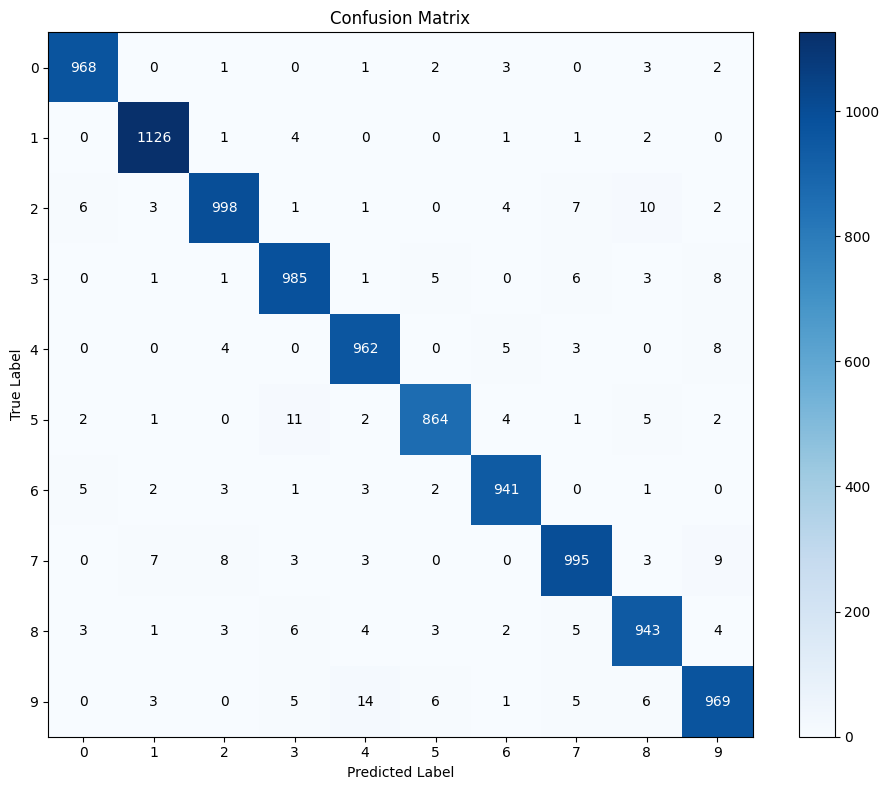

Shallow model saved to shallow_model.pth


In [40]:
# Train the shallow model using our new function
history_shallow, trained_shallow_model = train_and_evaluate_model(
    shallow_model,
    "Shallow",
    learning_rate,
    epochs=epochs,
    batch_size=batch_size,
    device=device
)


Training deeper Model...


Epoch 1/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 264.19it/s, loss=0.103, acc=0.944] 


Epoch 1/100 - 3.40s - train_loss: 0.3777 - train_acc: 0.8947 - val_loss: 0.1912 - val_acc: 0.9440


Epoch 2/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 512.29it/s, loss=0.0288, acc=0.955]


Epoch 2/100 - 2.61s - train_loss: 0.1573 - train_acc: 0.9533 - val_loss: 0.1474 - val_acc: 0.9547


Epoch 3/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 704.53it/s, loss=0.0304, acc=0.965]


Epoch 3/100 - 2.65s - train_loss: 0.1109 - train_acc: 0.9663 - val_loss: 0.1194 - val_acc: 0.9651


Epoch 4/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 666.67it/s, loss=0.0209, acc=0.967]


Epoch 4/100 - 2.56s - train_loss: 0.0837 - train_acc: 0.9747 - val_loss: 0.1093 - val_acc: 0.9668


Epoch 5/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 702.89it/s, loss=0.0154, acc=0.97] 


Epoch 5/100 - 2.46s - train_loss: 0.0654 - train_acc: 0.9799 - val_loss: 0.0961 - val_acc: 0.9699


Epoch 6/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 698.18it/s, loss=0.0365, acc=0.971] 


Epoch 6/100 - 2.42s - train_loss: 0.0532 - train_acc: 0.9830 - val_loss: 0.1027 - val_acc: 0.9707


Epoch 7/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 282.09it/s, loss=0.00872, acc=0.972]


Epoch 7/100 - 2.91s - train_loss: 0.0439 - train_acc: 0.9859 - val_loss: 0.0957 - val_acc: 0.9719


Epoch 8/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 256.17it/s, loss=0.00918, acc=0.972]


Epoch 8/100 - 3.05s - train_loss: 0.0333 - train_acc: 0.9892 - val_loss: 0.0982 - val_acc: 0.9716


Epoch 9/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 617.80it/s, loss=0.00226, acc=0.973]


Epoch 9/100 - 2.59s - train_loss: 0.0280 - train_acc: 0.9910 - val_loss: 0.1020 - val_acc: 0.9727


Epoch 10/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 611.14it/s, loss=0.00289, acc=0.975]


Epoch 10/100 - 2.45s - train_loss: 0.0223 - train_acc: 0.9930 - val_loss: 0.0979 - val_acc: 0.9748


Epoch 11/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 738.22it/s, loss=0.00166, acc=0.973] 


Epoch 11/100 - 2.38s - train_loss: 0.0189 - train_acc: 0.9937 - val_loss: 0.1153 - val_acc: 0.9732


Epoch 12/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 652.33it/s, loss=0.00214, acc=0.974]


Epoch 12/100 - 2.58s - train_loss: 0.0183 - train_acc: 0.9940 - val_loss: 0.1067 - val_acc: 0.9744


Epoch 13/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 678.26it/s, loss=0.0528, acc=0.973] 


Epoch 13/100 - 2.44s - train_loss: 0.0145 - train_acc: 0.9954 - val_loss: 0.1178 - val_acc: 0.9731


Epoch 14/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 421.57it/s, loss=0.000686, acc=0.974]


Epoch 14/100 - 2.73s - train_loss: 0.0138 - train_acc: 0.9955 - val_loss: 0.1195 - val_acc: 0.9738


Epoch 15/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 662.16it/s, loss=0.000249, acc=0.975]


Epoch 15/100 - 2.64s - train_loss: 0.0122 - train_acc: 0.9958 - val_loss: 0.1172 - val_acc: 0.9751


Epoch 16/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 697.43it/s, loss=0.00367, acc=0.974]


Epoch 16/100 - 2.42s - train_loss: 0.0108 - train_acc: 0.9967 - val_loss: 0.1322 - val_acc: 0.9739


Epoch 17/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 638.43it/s, loss=0.00174, acc=0.975]


Epoch 17/100 - 2.32s - train_loss: 0.0120 - train_acc: 0.9962 - val_loss: 0.1180 - val_acc: 0.9752
Early stopping triggered after 17 epochs
Loaded best model with validation loss: 0.0957

deeper Model Training Complete.

Evaluating deeper Model on Test Set...


Evaluating: 100%|██████████| 157/157 [00:00<00:00, 608.75it/s, loss=8.87e-6, acc=0.977] 


Test Loss: 0.1116 - Test Accuracy: 0.9771

Class-wise metrics:
Class 0: Accuracy=0.9898, Precision=0.9710, Recall=0.9898, F1-Score=0.9803
Class 1: Accuracy=0.9912, Precision=0.9886, Recall=0.9912, F1-Score=0.9899
Class 2: Accuracy=0.9855, Precision=0.9713, Recall=0.9855, F1-Score=0.9784
Class 3: Accuracy=0.9752, Precision=0.9685, Recall=0.9752, F1-Score=0.9719
Class 4: Accuracy=0.9725, Precision=0.9795, Recall=0.9725, F1-Score=0.9760
Class 5: Accuracy=0.9787, Precision=0.9668, Recall=0.9787, F1-Score=0.9727
Class 6: Accuracy=0.9697, Precision=0.9894, Recall=0.9697, F1-Score=0.9794
Class 7: Accuracy=0.9728, Precision=0.9775, Recall=0.9728, F1-Score=0.9751
Class 8: Accuracy=0.9713, Precision=0.9783, Recall=0.9713, F1-Score=0.9748
Class 9: Accuracy=0.9623, Precision=0.9788, Recall=0.9623, F1-Score=0.9705


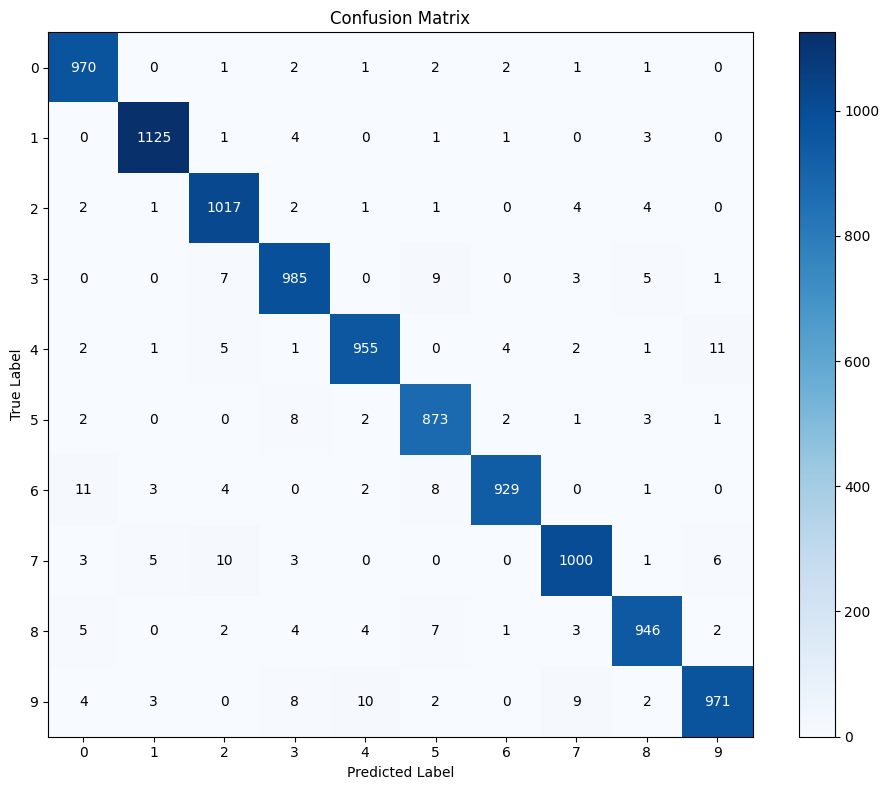

deeper model saved to deeper_model.pth


In [41]:
# Train the deeper model
history_deeper, trained_deeper_model = train_and_evaluate_model(
    deeper_model,
    "deeper",
    learning_rate,
    epochs=epochs,
    batch_size=batch_size,
    device=device
)



Training wider Model...


Epoch 1/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 269.58it/s, loss=0.0708, acc=0.953]


Epoch 1/100 - 3.27s - train_loss: 0.3060 - train_acc: 0.9132 - val_loss: 0.1517 - val_acc: 0.9532


Epoch 2/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 590.16it/s, loss=0.0394, acc=0.965]


Epoch 2/100 - 2.96s - train_loss: 0.1157 - train_acc: 0.9647 - val_loss: 0.1123 - val_acc: 0.9654


Epoch 3/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 636.57it/s, loss=0.0113, acc=0.971] 


Epoch 3/100 - 2.84s - train_loss: 0.0753 - train_acc: 0.9760 - val_loss: 0.0946 - val_acc: 0.9706


Epoch 4/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 692.87it/s, loss=0.0239, acc=0.972]


Epoch 4/100 - 2.61s - train_loss: 0.0566 - train_acc: 0.9822 - val_loss: 0.0924 - val_acc: 0.9715


Epoch 5/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 641.90it/s, loss=0.0347, acc=0.975] 


Epoch 5/100 - 2.52s - train_loss: 0.0399 - train_acc: 0.9876 - val_loss: 0.0929 - val_acc: 0.9753


Epoch 6/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 755.18it/s, loss=0.00244, acc=0.975]


Epoch 6/100 - 2.40s - train_loss: 0.0317 - train_acc: 0.9899 - val_loss: 0.0930 - val_acc: 0.9753


Epoch 7/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 694.52it/s, loss=0.00162, acc=0.975] 


Epoch 7/100 - 2.50s - train_loss: 0.0268 - train_acc: 0.9910 - val_loss: 0.0920 - val_acc: 0.9752


Epoch 8/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 278.76it/s, loss=0.0247, acc=0.976]  


Epoch 8/100 - 2.89s - train_loss: 0.0192 - train_acc: 0.9938 - val_loss: 0.0922 - val_acc: 0.9756


Epoch 9/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 655.21it/s, loss=0.00182, acc=0.974]


Epoch 9/100 - 2.45s - train_loss: 0.0195 - train_acc: 0.9935 - val_loss: 0.1177 - val_acc: 0.9738


Epoch 10/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 753.10it/s, loss=0.00573, acc=0.976]


Epoch 10/100 - 2.41s - train_loss: 0.0141 - train_acc: 0.9954 - val_loss: 0.0951 - val_acc: 0.9764


Epoch 11/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 663.95it/s, loss=0.0254, acc=0.978]  


Epoch 11/100 - 2.35s - train_loss: 0.0136 - train_acc: 0.9958 - val_loss: 0.0980 - val_acc: 0.9780


Epoch 12/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 676.15it/s, loss=0.00774, acc=0.978] 


Epoch 12/100 - 2.43s - train_loss: 0.0122 - train_acc: 0.9957 - val_loss: 0.1007 - val_acc: 0.9782


Epoch 13/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 683.49it/s, loss=0.00143, acc=0.979] 


Epoch 13/100 - 2.30s - train_loss: 0.0104 - train_acc: 0.9968 - val_loss: 0.1046 - val_acc: 0.9786


Epoch 14/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 709.72it/s, loss=9.95e-5, acc=0.978] 


Epoch 14/100 - 2.45s - train_loss: 0.0088 - train_acc: 0.9972 - val_loss: 0.1225 - val_acc: 0.9776


Epoch 15/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 734.04it/s, loss=0.000364, acc=0.98]


Epoch 15/100 - 2.37s - train_loss: 0.0119 - train_acc: 0.9961 - val_loss: 0.1113 - val_acc: 0.9797


Epoch 16/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 676.50it/s, loss=0.00768, acc=0.98]  


Epoch 16/100 - 2.70s - train_loss: 0.0112 - train_acc: 0.9960 - val_loss: 0.1123 - val_acc: 0.9800


Epoch 17/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 723.41it/s, loss=0.000188, acc=0.979]


Epoch 17/100 - 2.35s - train_loss: 0.0058 - train_acc: 0.9981 - val_loss: 0.1192 - val_acc: 0.9788
Early stopping triggered after 17 epochs
Loaded best model with validation loss: 0.0920

wider Model Training Complete.

Evaluating wider Model on Test Set...


Evaluating: 100%|██████████| 157/157 [00:00<00:00, 651.89it/s, loss=2.25e-6, acc=0.981] 


Test Loss: 0.0966 - Test Accuracy: 0.9805

Class-wise metrics:
Class 0: Accuracy=0.9918, Precision=0.9848, Recall=0.9918, F1-Score=0.9883
Class 1: Accuracy=0.9956, Precision=0.9912, Recall=0.9956, F1-Score=0.9934
Class 2: Accuracy=0.9826, Precision=0.9769, Recall=0.9826, F1-Score=0.9797
Class 3: Accuracy=0.9822, Precision=0.9735, Recall=0.9822, F1-Score=0.9778
Class 4: Accuracy=0.9817, Precision=0.9827, Recall=0.9817, F1-Score=0.9822
Class 5: Accuracy=0.9765, Precision=0.9853, Recall=0.9765, F1-Score=0.9809
Class 6: Accuracy=0.9812, Precision=0.9874, Recall=0.9812, F1-Score=0.9843
Class 7: Accuracy=0.9698, Precision=0.9823, Recall=0.9698, F1-Score=0.9760
Class 8: Accuracy=0.9764, Precision=0.9684, Recall=0.9764, F1-Score=0.9724
Class 9: Accuracy=0.9653, Precision=0.9721, Recall=0.9653, F1-Score=0.9687


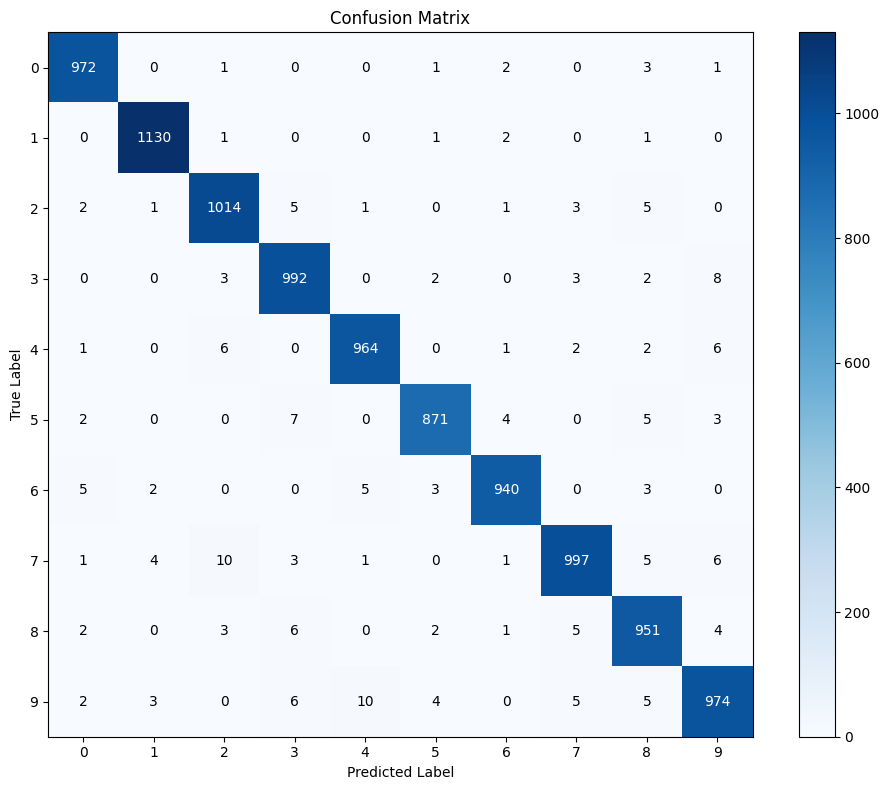

wider model saved to wider_model.pth


In [42]:
# Train the wider model
history_wider, trained_wider_model = train_and_evaluate_model(
    wider_model,
    "wider",
    learning_rate,
    epochs=epochs,
    batch_size=batch_size,
    device=device
)



Training CNN Model...


Epoch 1/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 597.71it/s, loss=0.0361, acc=0.972] 


Epoch 1/100 - 3.27s - train_loss: 0.3870 - train_acc: 0.8687 - val_loss: 0.0917 - val_acc: 0.9716


Epoch 2/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 549.33it/s, loss=0.0106, acc=0.982] 


Epoch 2/100 - 3.04s - train_loss: 0.1027 - train_acc: 0.9693 - val_loss: 0.0608 - val_acc: 0.9822


Epoch 3/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 579.77it/s, loss=0.00593, acc=0.983] 


Epoch 3/100 - 3.02s - train_loss: 0.0698 - train_acc: 0.9788 - val_loss: 0.0584 - val_acc: 0.9830


Epoch 4/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 520.60it/s, loss=0.0143, acc=0.982] 


Epoch 4/100 - 3.23s - train_loss: 0.0574 - train_acc: 0.9823 - val_loss: 0.0592 - val_acc: 0.9820


Epoch 5/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 523.25it/s, loss=0.00121, acc=0.987] 


Epoch 5/100 - 3.11s - train_loss: 0.0465 - train_acc: 0.9861 - val_loss: 0.0466 - val_acc: 0.9868


Epoch 6/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 524.54it/s, loss=0.000647, acc=0.987]


Epoch 6/100 - 3.13s - train_loss: 0.0423 - train_acc: 0.9874 - val_loss: 0.0513 - val_acc: 0.9872


Epoch 7/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 553.14it/s, loss=0.000836, acc=0.989]


Epoch 7/100 - 3.20s - train_loss: 0.0357 - train_acc: 0.9896 - val_loss: 0.0458 - val_acc: 0.9889


Epoch 8/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 502.09it/s, loss=0.00264, acc=0.988] 


Epoch 8/100 - 3.29s - train_loss: 0.0326 - train_acc: 0.9898 - val_loss: 0.0458 - val_acc: 0.9875


Epoch 9/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 531.59it/s, loss=0.000329, acc=0.989]


Epoch 9/100 - 3.21s - train_loss: 0.0259 - train_acc: 0.9920 - val_loss: 0.0433 - val_acc: 0.9889


Epoch 10/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 489.66it/s, loss=0.000561, acc=0.989]


Epoch 10/100 - 3.22s - train_loss: 0.0252 - train_acc: 0.9918 - val_loss: 0.0451 - val_acc: 0.9885


Epoch 11/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 502.93it/s, loss=4.32e-5, acc=0.989] 


Epoch 11/100 - 3.14s - train_loss: 0.0223 - train_acc: 0.9929 - val_loss: 0.0501 - val_acc: 0.9891


Epoch 12/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 465.34it/s, loss=0.000394, acc=0.99] 


Epoch 12/100 - 3.20s - train_loss: 0.0235 - train_acc: 0.9921 - val_loss: 0.0427 - val_acc: 0.9896


Epoch 13/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 527.41it/s, loss=0.000216, acc=0.989]


Epoch 13/100 - 3.01s - train_loss: 0.0191 - train_acc: 0.9939 - val_loss: 0.0496 - val_acc: 0.9885


Epoch 14/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 553.84it/s, loss=0.0029, acc=0.987]  


Epoch 14/100 - 3.10s - train_loss: 0.0172 - train_acc: 0.9947 - val_loss: 0.0573 - val_acc: 0.9869


Epoch 15/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 544.87it/s, loss=0.000216, acc=0.988]


Epoch 15/100 - 3.27s - train_loss: 0.0169 - train_acc: 0.9945 - val_loss: 0.0530 - val_acc: 0.9881


Epoch 16/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 566.72it/s, loss=5.99e-5, acc=0.991] 


Epoch 16/100 - 3.06s - train_loss: 0.0163 - train_acc: 0.9948 - val_loss: 0.0464 - val_acc: 0.9907


Epoch 17/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 524.94it/s, loss=0.000162, acc=0.989]


Epoch 17/100 - 3.19s - train_loss: 0.0133 - train_acc: 0.9961 - val_loss: 0.0548 - val_acc: 0.9893


Epoch 18/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 555.09it/s, loss=1.88e-5, acc=0.989] 


Epoch 18/100 - 3.15s - train_loss: 0.0126 - train_acc: 0.9958 - val_loss: 0.0578 - val_acc: 0.9888


Epoch 19/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 579.08it/s, loss=8.65e-5, acc=0.99]  


Epoch 19/100 - 3.02s - train_loss: 0.0158 - train_acc: 0.9951 - val_loss: 0.0481 - val_acc: 0.9904


Epoch 20/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 455.37it/s, loss=2.33e-5, acc=0.989] 


Epoch 20/100 - 3.44s - train_loss: 0.0114 - train_acc: 0.9964 - val_loss: 0.0593 - val_acc: 0.9886


Epoch 21/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 502.31it/s, loss=5.34e-5, acc=0.99]  


Epoch 21/100 - 3.62s - train_loss: 0.0128 - train_acc: 0.9959 - val_loss: 0.0523 - val_acc: 0.9898


Epoch 22/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 561.55it/s, loss=2.67e-5, acc=0.99]  


Epoch 22/100 - 3.39s - train_loss: 0.0095 - train_acc: 0.9971 - val_loss: 0.0519 - val_acc: 0.9901
Early stopping triggered after 22 epochs
Loaded best model with validation loss: 0.0427

CNN Model Training Complete.

Evaluating CNN Model on Test Set...


Evaluating: 100%|██████████| 157/157 [00:00<00:00, 482.89it/s, loss=2e-6, acc=0.991]    


Test Loss: 0.0333 - Test Accuracy: 0.9913

Class-wise metrics:
Class 0: Accuracy=0.9980, Precision=0.9879, Recall=0.9980, F1-Score=0.9929
Class 1: Accuracy=0.9956, Precision=0.9974, Recall=0.9956, F1-Score=0.9965
Class 2: Accuracy=0.9845, Precision=0.9971, Recall=0.9845, F1-Score=0.9907
Class 3: Accuracy=0.9931, Precision=0.9960, Recall=0.9931, F1-Score=0.9945
Class 4: Accuracy=0.9929, Precision=0.9909, Recall=0.9929, F1-Score=0.9919
Class 5: Accuracy=0.9922, Precision=0.9877, Recall=0.9922, F1-Score=0.9899
Class 6: Accuracy=0.9864, Precision=0.9958, Recall=0.9864, F1-Score=0.9911
Class 7: Accuracy=0.9942, Precision=0.9817, Recall=0.9942, F1-Score=0.9879
Class 8: Accuracy=0.9897, Precision=0.9877, Recall=0.9897, F1-Score=0.9887
Class 9: Accuracy=0.9861, Precision=0.9900, Recall=0.9861, F1-Score=0.9881


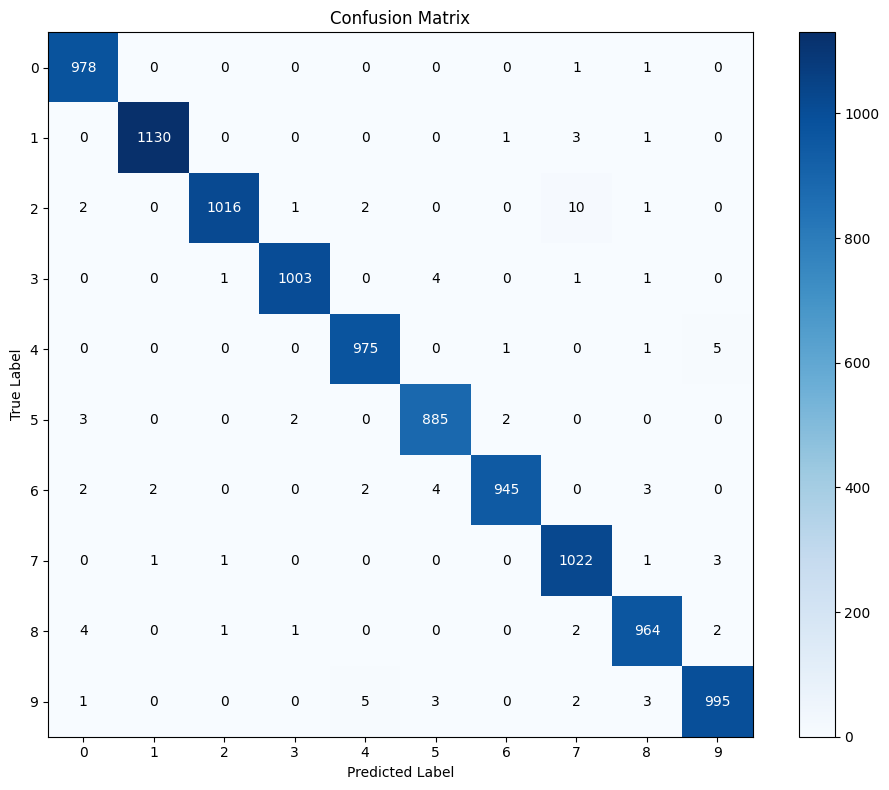

CNN model saved to cnn_model.pth


In [43]:
# Train the CNN model
history_cnn, trained_cnn_model = train_and_evaluate_model(
    cnn_model,
    "CNN",
    learning_rate,
    epochs=epochs,
    batch_size=batch_size,
    device=device
)



Training Wider_Deeper Model...


Epoch 1/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 421.47it/s, loss=0.0234, acc=0.954]


Epoch 1/100 - 4.06s - train_loss: 0.3581 - train_acc: 0.8889 - val_loss: 0.1554 - val_acc: 0.9538


Epoch 2/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 529.39it/s, loss=0.0239, acc=0.968] 


Epoch 2/100 - 3.42s - train_loss: 0.1256 - train_acc: 0.9621 - val_loss: 0.1162 - val_acc: 0.9679


Epoch 3/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 482.33it/s, loss=0.102, acc=0.97]   


Epoch 3/100 - 3.78s - train_loss: 0.0837 - train_acc: 0.9750 - val_loss: 0.1053 - val_acc: 0.9704


Epoch 4/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 561.01it/s, loss=0.0099, acc=0.968] 


Epoch 4/100 - 3.42s - train_loss: 0.0656 - train_acc: 0.9799 - val_loss: 0.1195 - val_acc: 0.9682


Epoch 5/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 466.17it/s, loss=0.0242, acc=0.97]  


Epoch 5/100 - 3.66s - train_loss: 0.0537 - train_acc: 0.9842 - val_loss: 0.1192 - val_acc: 0.9702


Epoch 6/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 470.25it/s, loss=0.00679, acc=0.977]


Epoch 6/100 - 3.50s - train_loss: 0.0450 - train_acc: 0.9866 - val_loss: 0.0929 - val_acc: 0.9772


Epoch 7/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 509.55it/s, loss=0.00696, acc=0.976]


Epoch 7/100 - 3.83s - train_loss: 0.0354 - train_acc: 0.9895 - val_loss: 0.0979 - val_acc: 0.9763


Epoch 8/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 476.75it/s, loss=0.00345, acc=0.971]


Epoch 8/100 - 3.58s - train_loss: 0.0321 - train_acc: 0.9906 - val_loss: 0.1252 - val_acc: 0.9713


Epoch 9/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 466.66it/s, loss=0.00121, acc=0.976] 


Epoch 9/100 - 3.81s - train_loss: 0.0297 - train_acc: 0.9908 - val_loss: 0.1124 - val_acc: 0.9757


Epoch 10/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 439.47it/s, loss=0.00138, acc=0.976]


Epoch 10/100 - 3.88s - train_loss: 0.0262 - train_acc: 0.9923 - val_loss: 0.1087 - val_acc: 0.9758


Epoch 11/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 508.69it/s, loss=0.000987, acc=0.978]


Epoch 11/100 - 3.65s - train_loss: 0.0233 - train_acc: 0.9930 - val_loss: 0.1135 - val_acc: 0.9775


Epoch 12/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 468.60it/s, loss=0.000249, acc=0.98] 


Epoch 12/100 - 3.80s - train_loss: 0.0206 - train_acc: 0.9940 - val_loss: 0.0971 - val_acc: 0.9800


Epoch 13/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 443.64it/s, loss=0.0106, acc=0.979] 


Epoch 13/100 - 3.33s - train_loss: 0.0199 - train_acc: 0.9942 - val_loss: 0.0986 - val_acc: 0.9788


Epoch 14/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 443.66it/s, loss=0.00101, acc=0.979] 


Epoch 14/100 - 3.82s - train_loss: 0.0164 - train_acc: 0.9953 - val_loss: 0.1134 - val_acc: 0.9785


Epoch 15/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 262.31it/s, loss=0.00126, acc=0.976] 


Epoch 15/100 - 4.00s - train_loss: 0.0176 - train_acc: 0.9950 - val_loss: 0.1284 - val_acc: 0.9763


Epoch 16/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 435.78it/s, loss=0.059, acc=0.978]   


Epoch 16/100 - 3.70s - train_loss: 0.0154 - train_acc: 0.9958 - val_loss: 0.1084 - val_acc: 0.9778
Early stopping triggered after 16 epochs
Loaded best model with validation loss: 0.0929

Wider_Deeper Model Training Complete.

Evaluating Wider_Deeper Model on Test Set...


Evaluating: 100%|██████████| 157/157 [00:00<00:00, 418.83it/s, loss=6.03e-5, acc=0.978] 


Test Loss: 0.1082 - Test Accuracy: 0.9780

Class-wise metrics:
Class 0: Accuracy=0.9888, Precision=0.9878, Recall=0.9888, F1-Score=0.9883
Class 1: Accuracy=0.9903, Precision=0.9912, Recall=0.9903, F1-Score=0.9907
Class 2: Accuracy=0.9622, Precision=0.9890, Recall=0.9622, F1-Score=0.9754
Class 3: Accuracy=0.9901, Precision=0.9407, Recall=0.9901, F1-Score=0.9648
Class 4: Accuracy=0.9715, Precision=0.9876, Recall=0.9715, F1-Score=0.9795
Class 5: Accuracy=0.9619, Precision=0.9873, Recall=0.9619, F1-Score=0.9744
Class 6: Accuracy=0.9802, Precision=0.9884, Recall=0.9802, F1-Score=0.9843
Class 7: Accuracy=0.9796, Precision=0.9777, Recall=0.9796, F1-Score=0.9786
Class 8: Accuracy=0.9764, Precision=0.9684, Recall=0.9764, F1-Score=0.9724
Class 9: Accuracy=0.9762, Precision=0.9647, Recall=0.9762, F1-Score=0.9704


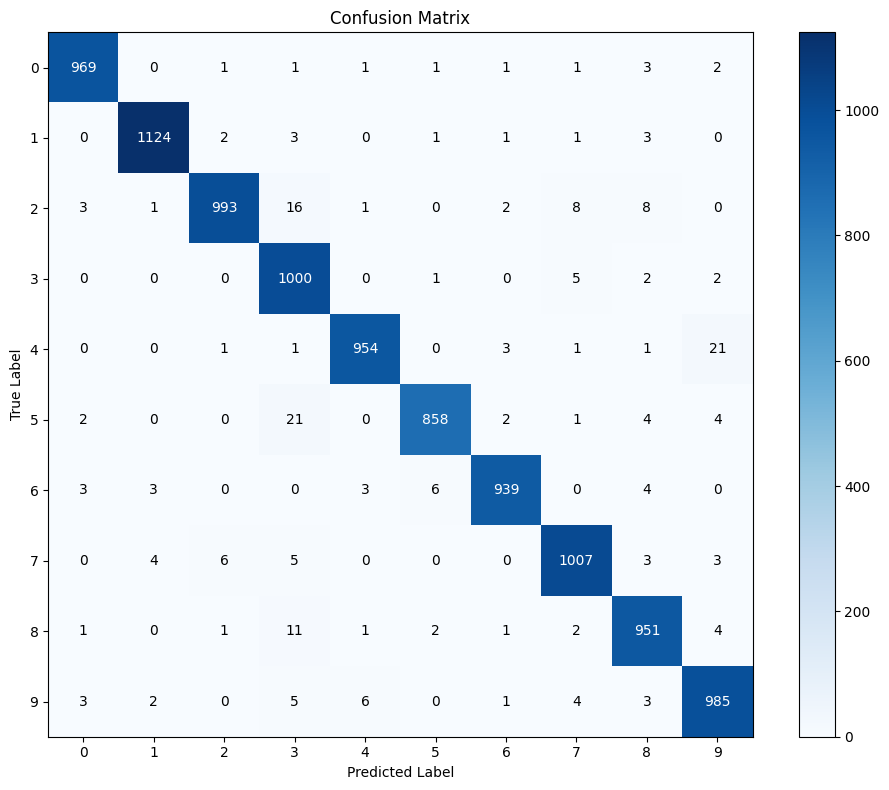

Wider_Deeper model saved to wider_deeper_model.pth


In [44]:
# Train the wider-deeper model
history_wider_deeper, trained_wider_deeper_model = train_and_evaluate_model(
    wider_deeper_model,
    "Wider_Deeper",
    learning_rate,
    epochs=epochs,
    batch_size=batch_size,
    device=device
)


Training Big_MLP Model...


Epoch 1/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 507.71it/s, loss=0.157, acc=0.953] 


Epoch 1/100 - 3.06s - train_loss: 0.2866 - train_acc: 0.9139 - val_loss: 0.1489 - val_acc: 0.9533


Epoch 2/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 442.97it/s, loss=0.0233, acc=0.966]


Epoch 2/100 - 3.49s - train_loss: 0.1043 - train_acc: 0.9674 - val_loss: 0.1072 - val_acc: 0.9657


Epoch 3/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 515.02it/s, loss=0.0459, acc=0.972] 


Epoch 3/100 - 3.21s - train_loss: 0.0643 - train_acc: 0.9798 - val_loss: 0.0962 - val_acc: 0.9718


Epoch 4/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 501.55it/s, loss=0.0355, acc=0.976] 


Epoch 4/100 - 3.43s - train_loss: 0.0483 - train_acc: 0.9848 - val_loss: 0.0883 - val_acc: 0.9758


Epoch 5/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 304.65it/s, loss=0.0093, acc=0.976]  


Epoch 5/100 - 3.22s - train_loss: 0.0353 - train_acc: 0.9886 - val_loss: 0.0911 - val_acc: 0.9758


Epoch 6/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 502.51it/s, loss=0.00337, acc=0.978] 


Epoch 6/100 - 3.22s - train_loss: 0.0299 - train_acc: 0.9900 - val_loss: 0.0777 - val_acc: 0.9778


Epoch 7/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 522.96it/s, loss=0.0405, acc=0.975]  


Epoch 7/100 - 3.23s - train_loss: 0.0242 - train_acc: 0.9919 - val_loss: 0.1001 - val_acc: 0.9749


Epoch 8/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 512.56it/s, loss=0.0912, acc=0.974]  


Epoch 8/100 - 3.46s - train_loss: 0.0195 - train_acc: 0.9937 - val_loss: 0.1136 - val_acc: 0.9737


Epoch 9/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 498.68it/s, loss=0.000259, acc=0.976]


Epoch 9/100 - 3.07s - train_loss: 0.0180 - train_acc: 0.9939 - val_loss: 0.1053 - val_acc: 0.9762


Epoch 10/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 549.75it/s, loss=0.000956, acc=0.978]


Epoch 10/100 - 3.20s - train_loss: 0.0161 - train_acc: 0.9947 - val_loss: 0.0987 - val_acc: 0.9777


Epoch 11/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 469.25it/s, loss=0.00218, acc=0.979] 


Epoch 11/100 - 3.37s - train_loss: 0.0164 - train_acc: 0.9951 - val_loss: 0.0832 - val_acc: 0.9792


Epoch 12/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 482.18it/s, loss=0.00054, acc=0.978] 


Epoch 12/100 - 3.08s - train_loss: 0.0136 - train_acc: 0.9957 - val_loss: 0.1035 - val_acc: 0.9778


Epoch 13/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 448.17it/s, loss=0.00151, acc=0.978] 


Epoch 13/100 - 3.40s - train_loss: 0.0122 - train_acc: 0.9961 - val_loss: 0.1006 - val_acc: 0.9782


Epoch 14/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 569.62it/s, loss=0.000608, acc=0.977]


Epoch 14/100 - 3.33s - train_loss: 0.0096 - train_acc: 0.9971 - val_loss: 0.1147 - val_acc: 0.9769


Epoch 15/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 205.73it/s, loss=0.000563, acc=0.98] 


Epoch 15/100 - 3.71s - train_loss: 0.0115 - train_acc: 0.9965 - val_loss: 0.1000 - val_acc: 0.9799


Epoch 16/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 511.75it/s, loss=0.000607, acc=0.98] 


Epoch 16/100 - 3.05s - train_loss: 0.0107 - train_acc: 0.9965 - val_loss: 0.1008 - val_acc: 0.9795
Early stopping triggered after 16 epochs
Loaded best model with validation loss: 0.0777

Big_MLP Model Training Complete.

Evaluating Big_MLP Model on Test Set...


Evaluating: 100%|██████████| 157/157 [00:00<00:00, 226.54it/s, loss=2.24e-7, acc=0.98]  


Test Loss: 0.0911 - Test Accuracy: 0.9801

Class-wise metrics:
Class 0: Accuracy=0.9867, Precision=0.9877, Recall=0.9867, F1-Score=0.9872
Class 1: Accuracy=0.9903, Precision=0.9912, Recall=0.9903, F1-Score=0.9907
Class 2: Accuracy=0.9845, Precision=0.9845, Recall=0.9845, F1-Score=0.9845
Class 3: Accuracy=0.9812, Precision=0.9659, Recall=0.9812, F1-Score=0.9735
Class 4: Accuracy=0.9695, Precision=0.9865, Recall=0.9695, F1-Score=0.9779
Class 5: Accuracy=0.9619, Precision=0.9839, Recall=0.9619, F1-Score=0.9728
Class 6: Accuracy=0.9802, Precision=0.9832, Recall=0.9802, F1-Score=0.9817
Class 7: Accuracy=0.9844, Precision=0.9703, Recall=0.9844, F1-Score=0.9773
Class 8: Accuracy=0.9836, Precision=0.9677, Recall=0.9836, F1-Score=0.9756
Class 9: Accuracy=0.9752, Precision=0.9801, Recall=0.9752, F1-Score=0.9776


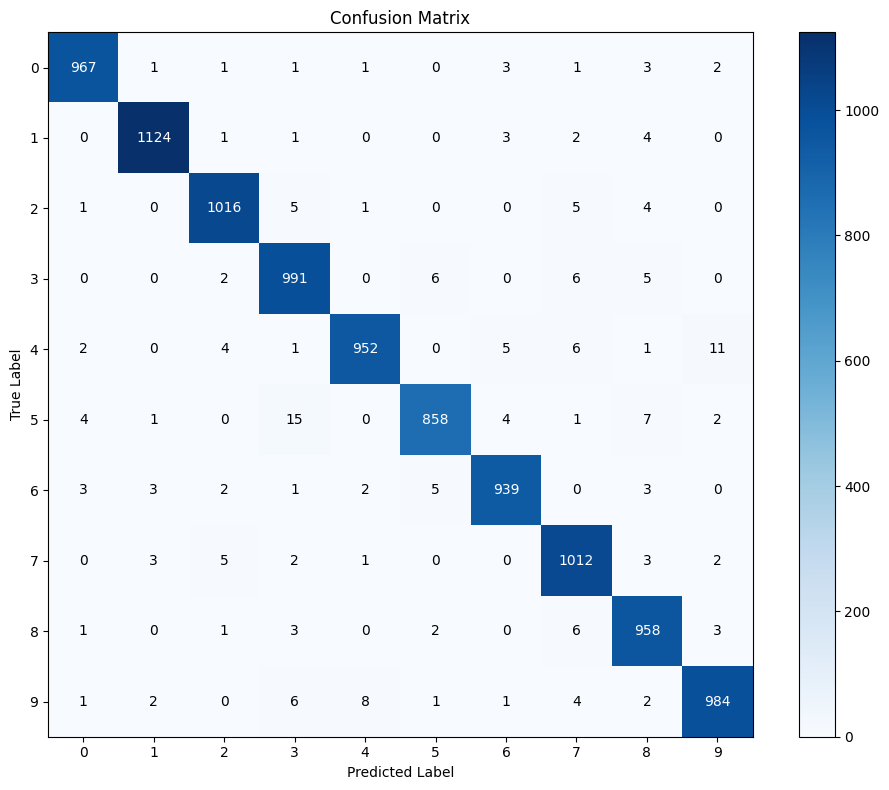

Big_MLP model saved to big_mlp_model.pth


In [45]:


# Train the big MLP model
history_big_mlp, trained_big_mlp_model = train_and_evaluate_model(
    big_mlp_model,
    "Big_MLP",
    learning_rate,
    epochs=epochs,
    batch_size=batch_size,
    device=device
)



Training Very_Big_MLP Model...


Epoch 1/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 544.81it/s, loss=0.00924, acc=0.955]


Epoch 1/100 - 3.58s - train_loss: 0.2582 - train_acc: 0.9209 - val_loss: 0.1624 - val_acc: 0.9553


Epoch 2/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 548.68it/s, loss=0.00485, acc=0.972]


Epoch 2/100 - 3.38s - train_loss: 0.1053 - train_acc: 0.9688 - val_loss: 0.0980 - val_acc: 0.9719


Epoch 3/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 562.25it/s, loss=0.0155, acc=0.962]


Epoch 3/100 - 3.37s - train_loss: 0.0738 - train_acc: 0.9776 - val_loss: 0.1415 - val_acc: 0.9622


Epoch 4/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 567.91it/s, loss=0.105, acc=0.969]  


Epoch 4/100 - 3.55s - train_loss: 0.0539 - train_acc: 0.9839 - val_loss: 0.1196 - val_acc: 0.9691


Epoch 5/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 519.92it/s, loss=0.00716, acc=0.975] 


Epoch 5/100 - 3.67s - train_loss: 0.0437 - train_acc: 0.9869 - val_loss: 0.1022 - val_acc: 0.9748


Epoch 6/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 637.11it/s, loss=0.00901, acc=0.978]


Epoch 6/100 - 3.03s - train_loss: 0.0382 - train_acc: 0.9887 - val_loss: 0.0875 - val_acc: 0.9783


Epoch 7/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 484.30it/s, loss=0.0119, acc=0.98]  


Epoch 7/100 - 3.26s - train_loss: 0.0314 - train_acc: 0.9912 - val_loss: 0.0909 - val_acc: 0.9800


Epoch 8/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 472.70it/s, loss=0.000516, acc=0.974]


Epoch 8/100 - 3.31s - train_loss: 0.0280 - train_acc: 0.9915 - val_loss: 0.1259 - val_acc: 0.9742


Epoch 9/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 622.44it/s, loss=0.00372, acc=0.976] 


Epoch 9/100 - 3.05s - train_loss: 0.0254 - train_acc: 0.9924 - val_loss: 0.1219 - val_acc: 0.9761


Epoch 10/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 685.86it/s, loss=0.00199, acc=0.979] 


Epoch 10/100 - 2.88s - train_loss: 0.0232 - train_acc: 0.9937 - val_loss: 0.1084 - val_acc: 0.9785


Epoch 11/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 665.34it/s, loss=0.000254, acc=0.979]


Epoch 11/100 - 2.75s - train_loss: 0.0237 - train_acc: 0.9939 - val_loss: 0.1028 - val_acc: 0.9790


Epoch 12/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 689.82it/s, loss=0.00331, acc=0.979]


Epoch 12/100 - 2.78s - train_loss: 0.0163 - train_acc: 0.9950 - val_loss: 0.1142 - val_acc: 0.9785


Epoch 13/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 593.27it/s, loss=0.00158, acc=0.98]  


Epoch 13/100 - 2.91s - train_loss: 0.0155 - train_acc: 0.9957 - val_loss: 0.1173 - val_acc: 0.9795


Epoch 14/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 567.76it/s, loss=0.0626, acc=0.978]  


Epoch 14/100 - 3.04s - train_loss: 0.0211 - train_acc: 0.9949 - val_loss: 0.1316 - val_acc: 0.9784


Epoch 15/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 698.45it/s, loss=0.000111, acc=0.98] 


Epoch 15/100 - 2.84s - train_loss: 0.0179 - train_acc: 0.9951 - val_loss: 0.1156 - val_acc: 0.9804


Epoch 16/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 644.66it/s, loss=0.000423, acc=0.981]


Epoch 16/100 - 2.82s - train_loss: 0.0166 - train_acc: 0.9959 - val_loss: 0.1184 - val_acc: 0.9806
Early stopping triggered after 16 epochs
Loaded best model with validation loss: 0.0875

Very_Big_MLP Model Training Complete.

Evaluating Very_Big_MLP Model on Test Set...


Evaluating: 100%|██████████| 157/157 [00:00<00:00, 651.41it/s, loss=7.91e-5, acc=0.983] 


Test Loss: 0.1026 - Test Accuracy: 0.9830

Class-wise metrics:
Class 0: Accuracy=0.9878, Precision=0.9938, Recall=0.9878, F1-Score=0.9908
Class 1: Accuracy=0.9921, Precision=0.9947, Recall=0.9921, F1-Score=0.9934
Class 2: Accuracy=0.9835, Precision=0.9902, Recall=0.9835, F1-Score=0.9869
Class 3: Accuracy=0.9782, Precision=0.9880, Recall=0.9782, F1-Score=0.9831
Class 4: Accuracy=0.9684, Precision=0.9835, Recall=0.9684, F1-Score=0.9759
Class 5: Accuracy=0.9787, Precision=0.9864, Recall=0.9787, F1-Score=0.9826
Class 6: Accuracy=0.9885, Precision=0.9824, Recall=0.9885, F1-Score=0.9854
Class 7: Accuracy=0.9835, Precision=0.9835, Recall=0.9835, F1-Score=0.9835
Class 8: Accuracy=0.9846, Precision=0.9796, Recall=0.9846, F1-Score=0.9821
Class 9: Accuracy=0.9832, Precision=0.9484, Recall=0.9832, F1-Score=0.9655


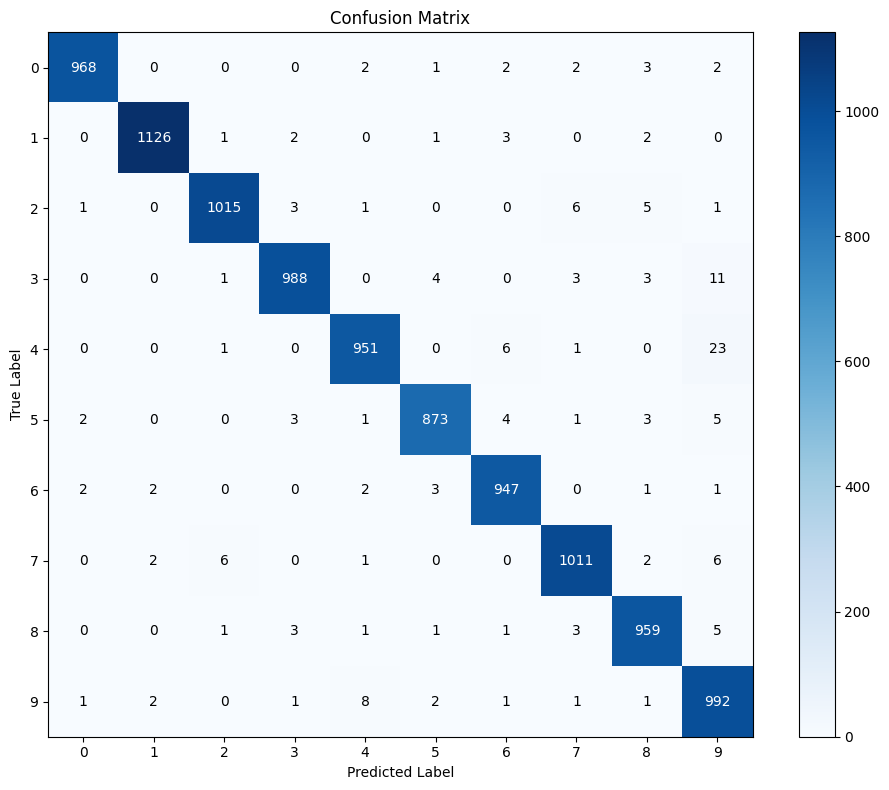

Very_Big_MLP model saved to very_big_mlp_model.pth


In [46]:
# Train the very big MLP model
history_very_big_mlp, trained_very_big_mlp_model = train_and_evaluate_model(
    very_big_mlp_model,
    "Very_Big_MLP",
    learning_rate,
    epochs=epochs,
    batch_size=batch_size,
    device=device
)



Training Small_CNN Model...


Epoch 1/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 464.84it/s, loss=0.00824, acc=0.978]


Epoch 1/100 - 3.54s - train_loss: 0.3058 - train_acc: 0.9035 - val_loss: 0.0759 - val_acc: 0.9777


Epoch 2/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 470.13it/s, loss=0.0136, acc=0.982] 


Epoch 2/100 - 3.47s - train_loss: 0.1018 - train_acc: 0.9700 - val_loss: 0.0578 - val_acc: 0.9824


Epoch 3/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 463.51it/s, loss=0.00158, acc=0.985]


Epoch 3/100 - 3.49s - train_loss: 0.0751 - train_acc: 0.9775 - val_loss: 0.0492 - val_acc: 0.9848


Epoch 4/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 431.64it/s, loss=0.00129, acc=0.987]


Epoch 4/100 - 3.56s - train_loss: 0.0620 - train_acc: 0.9805 - val_loss: 0.0467 - val_acc: 0.9867


Epoch 5/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 547.53it/s, loss=0.000743, acc=0.986]


Epoch 5/100 - 3.31s - train_loss: 0.0496 - train_acc: 0.9854 - val_loss: 0.0501 - val_acc: 0.9860


Epoch 6/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 441.92it/s, loss=0.00038, acc=0.988]


Epoch 6/100 - 3.74s - train_loss: 0.0457 - train_acc: 0.9859 - val_loss: 0.0446 - val_acc: 0.9878


Epoch 7/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 421.14it/s, loss=0.000157, acc=0.989]


Epoch 7/100 - 3.64s - train_loss: 0.0384 - train_acc: 0.9875 - val_loss: 0.0423 - val_acc: 0.9891


Epoch 8/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 461.58it/s, loss=6.46e-5, acc=0.989] 


Epoch 8/100 - 3.52s - train_loss: 0.0347 - train_acc: 0.9885 - val_loss: 0.0422 - val_acc: 0.9888


Epoch 9/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 456.10it/s, loss=0.000102, acc=0.987]


Epoch 9/100 - 3.49s - train_loss: 0.0280 - train_acc: 0.9906 - val_loss: 0.0479 - val_acc: 0.9868


Epoch 10/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 440.04it/s, loss=0.000121, acc=0.988]


Epoch 10/100 - 3.53s - train_loss: 0.0287 - train_acc: 0.9902 - val_loss: 0.0489 - val_acc: 0.9882


Epoch 11/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 489.39it/s, loss=4e-5, acc=0.988]    


Epoch 11/100 - 3.29s - train_loss: 0.0234 - train_acc: 0.9928 - val_loss: 0.0471 - val_acc: 0.9881


Epoch 12/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 509.59it/s, loss=1.22e-5, acc=0.989] 


Epoch 12/100 - 2.99s - train_loss: 0.0225 - train_acc: 0.9924 - val_loss: 0.0439 - val_acc: 0.9893


Epoch 13/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 503.26it/s, loss=0.00011, acc=0.989] 


Epoch 13/100 - 3.21s - train_loss: 0.0202 - train_acc: 0.9935 - val_loss: 0.0459 - val_acc: 0.9892


Epoch 14/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 502.44it/s, loss=1.4e-5, acc=0.988]  


Epoch 14/100 - 2.87s - train_loss: 0.0187 - train_acc: 0.9937 - val_loss: 0.0513 - val_acc: 0.9881


Epoch 15/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 510.14it/s, loss=2.28e-5, acc=0.987] 


Epoch 15/100 - 3.08s - train_loss: 0.0173 - train_acc: 0.9941 - val_loss: 0.0528 - val_acc: 0.9873


Epoch 16/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 552.61it/s, loss=2.94e-5, acc=0.987] 


Epoch 16/100 - 2.89s - train_loss: 0.0155 - train_acc: 0.9945 - val_loss: 0.0566 - val_acc: 0.9872


Epoch 17/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 645.64it/s, loss=5.4e-5, acc=0.989]  


Epoch 17/100 - 2.69s - train_loss: 0.0158 - train_acc: 0.9946 - val_loss: 0.0531 - val_acc: 0.9887


Epoch 18/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 637.95it/s, loss=2.59e-5, acc=0.989] 


Epoch 18/100 - 2.61s - train_loss: 0.0123 - train_acc: 0.9958 - val_loss: 0.0590 - val_acc: 0.9890
Early stopping triggered after 18 epochs
Loaded best model with validation loss: 0.0422

Small_CNN Model Training Complete.

Evaluating Small_CNN Model on Test Set...


Evaluating: 100%|██████████| 157/157 [00:00<00:00, 474.02it/s, loss=3.58e-7, acc=0.991] 


Test Loss: 0.0321 - Test Accuracy: 0.9913

Class-wise metrics:
Class 0: Accuracy=0.9980, Precision=0.9939, Recall=0.9980, F1-Score=0.9959
Class 1: Accuracy=0.9982, Precision=0.9939, Recall=0.9982, F1-Score=0.9960
Class 2: Accuracy=0.9942, Precision=0.9903, Recall=0.9942, F1-Score=0.9923
Class 3: Accuracy=0.9921, Precision=0.9960, Recall=0.9921, F1-Score=0.9940
Class 4: Accuracy=0.9959, Precision=0.9869, Recall=0.9959, F1-Score=0.9914
Class 5: Accuracy=0.9821, Precision=0.9910, Recall=0.9821, F1-Score=0.9865
Class 6: Accuracy=0.9948, Precision=0.9917, Recall=0.9948, F1-Score=0.9932
Class 7: Accuracy=0.9854, Precision=0.9883, Recall=0.9854, F1-Score=0.9868
Class 8: Accuracy=0.9959, Precision=0.9858, Recall=0.9959, F1-Score=0.9908
Class 9: Accuracy=0.9752, Precision=0.9949, Recall=0.9752, F1-Score=0.9850


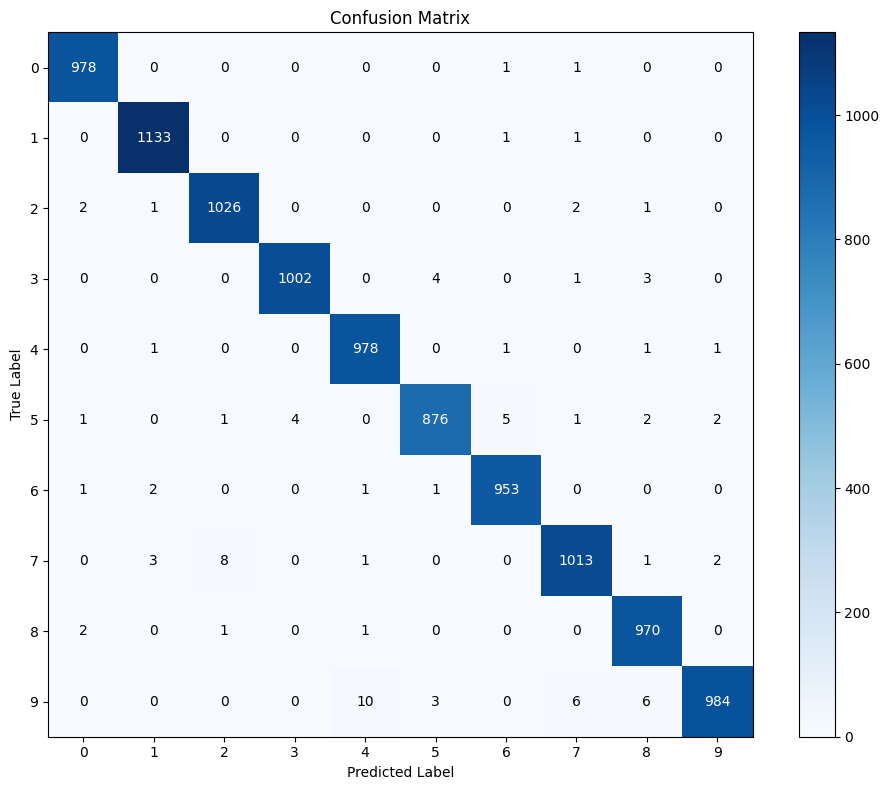

Small_CNN model saved to small_cnn_model.pth


In [47]:
# Train the small CNN model
history_small_cnn, trained_small_cnn_model = train_and_evaluate_model(
    small_cnn_model,
    "Small_CNN",
    learning_rate,
    epochs=epochs,
    batch_size=batch_size,
    device=device
)



Training Big_CNN Model...


Epoch 1/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 500.27it/s, loss=0.00506, acc=0.982]


Epoch 1/100 - 3.86s - train_loss: 0.2806 - train_acc: 0.9130 - val_loss: 0.0637 - val_acc: 0.9818


Epoch 2/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 500.45it/s, loss=0.0155, acc=0.985] 


Epoch 2/100 - 3.47s - train_loss: 0.0860 - train_acc: 0.9757 - val_loss: 0.0511 - val_acc: 0.9850


Epoch 3/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 507.75it/s, loss=0.00493, acc=0.986] 


Epoch 3/100 - 3.46s - train_loss: 0.0658 - train_acc: 0.9820 - val_loss: 0.0514 - val_acc: 0.9863


Epoch 4/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 470.25it/s, loss=0.0011, acc=0.985]  


Epoch 4/100 - 3.43s - train_loss: 0.0508 - train_acc: 0.9855 - val_loss: 0.0552 - val_acc: 0.9850


Epoch 5/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 538.01it/s, loss=0.00108, acc=0.989] 


Epoch 5/100 - 3.51s - train_loss: 0.0401 - train_acc: 0.9884 - val_loss: 0.0426 - val_acc: 0.9886


Epoch 6/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 511.77it/s, loss=0.000721, acc=0.989]


Epoch 6/100 - 3.56s - train_loss: 0.0364 - train_acc: 0.9894 - val_loss: 0.0417 - val_acc: 0.9892


Epoch 7/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 521.97it/s, loss=0.000715, acc=0.987]


Epoch 7/100 - 3.41s - train_loss: 0.0307 - train_acc: 0.9914 - val_loss: 0.0487 - val_acc: 0.9865


Epoch 8/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 509.97it/s, loss=0.00115, acc=0.988] 


Epoch 8/100 - 3.71s - train_loss: 0.0255 - train_acc: 0.9925 - val_loss: 0.0535 - val_acc: 0.9879


Epoch 9/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 493.96it/s, loss=5.16e-5, acc=0.988] 


Epoch 9/100 - 3.41s - train_loss: 0.0216 - train_acc: 0.9937 - val_loss: 0.0556 - val_acc: 0.9875


Epoch 10/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 568.02it/s, loss=1.44e-5, acc=0.99]  


Epoch 10/100 - 3.51s - train_loss: 0.0212 - train_acc: 0.9935 - val_loss: 0.0449 - val_acc: 0.9895


Epoch 11/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 495.07it/s, loss=1.95e-5, acc=0.989] 


Epoch 11/100 - 3.44s - train_loss: 0.0180 - train_acc: 0.9947 - val_loss: 0.0515 - val_acc: 0.9894


Epoch 12/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 504.90it/s, loss=0.000235, acc=0.988]


Epoch 12/100 - 3.60s - train_loss: 0.0189 - train_acc: 0.9944 - val_loss: 0.0472 - val_acc: 0.9877


Epoch 13/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 535.89it/s, loss=7.46e-5, acc=0.99]  


Epoch 13/100 - 3.34s - train_loss: 0.0169 - train_acc: 0.9953 - val_loss: 0.0445 - val_acc: 0.9902


Epoch 14/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 564.89it/s, loss=1e-5, acc=0.99]     


Epoch 14/100 - 3.36s - train_loss: 0.0146 - train_acc: 0.9959 - val_loss: 0.0524 - val_acc: 0.9897


Epoch 15/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 483.14it/s, loss=6.29e-5, acc=0.99] 


Epoch 15/100 - 3.39s - train_loss: 0.0115 - train_acc: 0.9965 - val_loss: 0.0562 - val_acc: 0.9902


Epoch 16/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 512.77it/s, loss=7.38e-7, acc=0.989] 


Epoch 16/100 - 3.53s - train_loss: 0.0096 - train_acc: 0.9972 - val_loss: 0.0607 - val_acc: 0.9891
Early stopping triggered after 16 epochs
Loaded best model with validation loss: 0.0417

Big_CNN Model Training Complete.

Evaluating Big_CNN Model on Test Set...


Evaluating: 100%|██████████| 157/157 [00:00<00:00, 534.68it/s, loss=0.00025, acc=0.991] 


Test Loss: 0.0467 - Test Accuracy: 0.9910

Class-wise metrics:
Class 0: Accuracy=0.9980, Precision=0.9929, Recall=0.9980, F1-Score=0.9954
Class 1: Accuracy=0.9965, Precision=0.9930, Recall=0.9965, F1-Score=0.9947
Class 2: Accuracy=0.9884, Precision=0.9913, Recall=0.9884, F1-Score=0.9898
Class 3: Accuracy=0.9970, Precision=0.9834, Recall=0.9970, F1-Score=0.9902
Class 4: Accuracy=0.9888, Precision=0.9949, Recall=0.9888, F1-Score=0.9918
Class 5: Accuracy=0.9877, Precision=0.9921, Recall=0.9877, F1-Score=0.9899
Class 6: Accuracy=0.9896, Precision=0.9937, Recall=0.9896, F1-Score=0.9916
Class 7: Accuracy=0.9854, Precision=0.9893, Recall=0.9854, F1-Score=0.9873
Class 8: Accuracy=0.9918, Precision=0.9887, Recall=0.9918, F1-Score=0.9903
Class 9: Accuracy=0.9861, Precision=0.9910, Recall=0.9861, F1-Score=0.9886


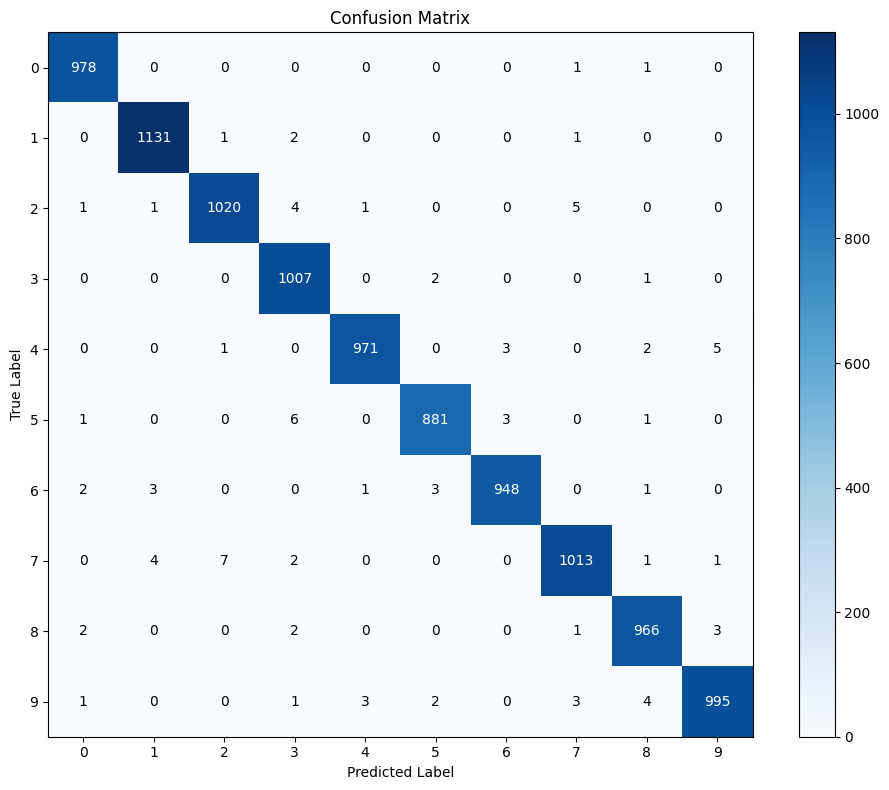

Big_CNN model saved to big_cnn_model.pth


In [48]:
# Train the big CNN model
history_big_cnn, trained_big_cnn_model = train_and_evaluate_model(
    big_cnn_model,
    "Big_CNN",
    learning_rate,
    epochs=epochs,
    batch_size=batch_size,
    device=device
)


Training Very_Big_CNN Model...


Epoch 1/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 330.66it/s, loss=0.0064, acc=0.98]  


Epoch 1/100 - 6.40s - train_loss: 0.2521 - train_acc: 0.9197 - val_loss: 0.0652 - val_acc: 0.9803


Epoch 2/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 353.93it/s, loss=0.00318, acc=0.986]


Epoch 2/100 - 5.94s - train_loss: 0.0791 - train_acc: 0.9774 - val_loss: 0.0524 - val_acc: 0.9857


Epoch 3/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 336.06it/s, loss=0.000886, acc=0.988]


Epoch 3/100 - 5.95s - train_loss: 0.0585 - train_acc: 0.9837 - val_loss: 0.0454 - val_acc: 0.9881


Epoch 4/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 337.56it/s, loss=0.00102, acc=0.989] 


Epoch 4/100 - 5.98s - train_loss: 0.0459 - train_acc: 0.9871 - val_loss: 0.0429 - val_acc: 0.9894


Epoch 5/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 313.72it/s, loss=0.000226, acc=0.989]


Epoch 5/100 - 5.94s - train_loss: 0.0380 - train_acc: 0.9891 - val_loss: 0.0435 - val_acc: 0.9888


Epoch 6/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 348.60it/s, loss=0.000121, acc=0.99]


Epoch 6/100 - 6.27s - train_loss: 0.0327 - train_acc: 0.9907 - val_loss: 0.0440 - val_acc: 0.9899


Epoch 7/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 334.11it/s, loss=8.55e-5, acc=0.989] 


Epoch 7/100 - 5.96s - train_loss: 0.0274 - train_acc: 0.9920 - val_loss: 0.0509 - val_acc: 0.9891


Epoch 8/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 336.20it/s, loss=2.35e-5, acc=0.991] 


Epoch 8/100 - 5.99s - train_loss: 0.0242 - train_acc: 0.9925 - val_loss: 0.0344 - val_acc: 0.9909


Epoch 9/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 362.90it/s, loss=3.52e-5, acc=0.991] 


Epoch 9/100 - 6.13s - train_loss: 0.0212 - train_acc: 0.9937 - val_loss: 0.0399 - val_acc: 0.9908


Epoch 10/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 315.95it/s, loss=1.22e-5, acc=0.991] 


Epoch 10/100 - 6.28s - train_loss: 0.0179 - train_acc: 0.9951 - val_loss: 0.0436 - val_acc: 0.9914


Epoch 11/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 305.47it/s, loss=1e-5, acc=0.991]    


Epoch 11/100 - 6.30s - train_loss: 0.0163 - train_acc: 0.9955 - val_loss: 0.0495 - val_acc: 0.9907


Epoch 12/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 322.11it/s, loss=3.3e-5, acc=0.988]  


Epoch 12/100 - 6.43s - train_loss: 0.0149 - train_acc: 0.9958 - val_loss: 0.0586 - val_acc: 0.9878


Epoch 13/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 326.11it/s, loss=2.62e-6, acc=0.99] 


Epoch 13/100 - 6.12s - train_loss: 0.0159 - train_acc: 0.9956 - val_loss: 0.0596 - val_acc: 0.9904


Epoch 14/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 318.77it/s, loss=3.72e-6, acc=0.99]  


Epoch 14/100 - 6.28s - train_loss: 0.0137 - train_acc: 0.9963 - val_loss: 0.0485 - val_acc: 0.9899


Epoch 15/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 312.64it/s, loss=1.64e-7, acc=0.991] 


Epoch 15/100 - 6.31s - train_loss: 0.0146 - train_acc: 0.9959 - val_loss: 0.0455 - val_acc: 0.9907


Epoch 16/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 292.20it/s, loss=7.53e-7, acc=0.99] 


Epoch 16/100 - 6.56s - train_loss: 0.0114 - train_acc: 0.9967 - val_loss: 0.0575 - val_acc: 0.9901


Epoch 17/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 333.79it/s, loss=9.31e-8, acc=0.991] 


Epoch 17/100 - 6.31s - train_loss: 0.0133 - train_acc: 0.9964 - val_loss: 0.0518 - val_acc: 0.9908


Epoch 18/100 [Val]: 100%|██████████| 188/188 [00:00<00:00, 341.70it/s, loss=1.94e-7, acc=0.991] 


Epoch 18/100 - 6.30s - train_loss: 0.0105 - train_acc: 0.9971 - val_loss: 0.0523 - val_acc: 0.9908
Early stopping triggered after 18 epochs
Loaded best model with validation loss: 0.0344

Very_Big_CNN Model Training Complete.

Evaluating Very_Big_CNN Model on Test Set...


Evaluating: 100%|██████████| 157/157 [00:00<00:00, 330.66it/s, loss=5.22e-8, acc=0.993] 


Test Loss: 0.0366 - Test Accuracy: 0.9932

Class-wise metrics:
Class 0: Accuracy=0.9980, Precision=0.9919, Recall=0.9980, F1-Score=0.9949
Class 1: Accuracy=0.9965, Precision=0.9930, Recall=0.9965, F1-Score=0.9947
Class 2: Accuracy=0.9971, Precision=0.9923, Recall=0.9971, F1-Score=0.9947
Class 3: Accuracy=0.9921, Precision=0.9970, Recall=0.9921, F1-Score=0.9945
Class 4: Accuracy=0.9939, Precision=0.9929, Recall=0.9939, F1-Score=0.9934
Class 5: Accuracy=0.9955, Precision=0.9889, Recall=0.9955, F1-Score=0.9922
Class 6: Accuracy=0.9948, Precision=0.9958, Recall=0.9948, F1-Score=0.9953
Class 7: Accuracy=0.9903, Precision=0.9874, Recall=0.9903, F1-Score=0.9888
Class 8: Accuracy=0.9908, Precision=0.9948, Recall=0.9908, F1-Score=0.9928
Class 9: Accuracy=0.9832, Precision=0.9980, Recall=0.9832, F1-Score=0.9905


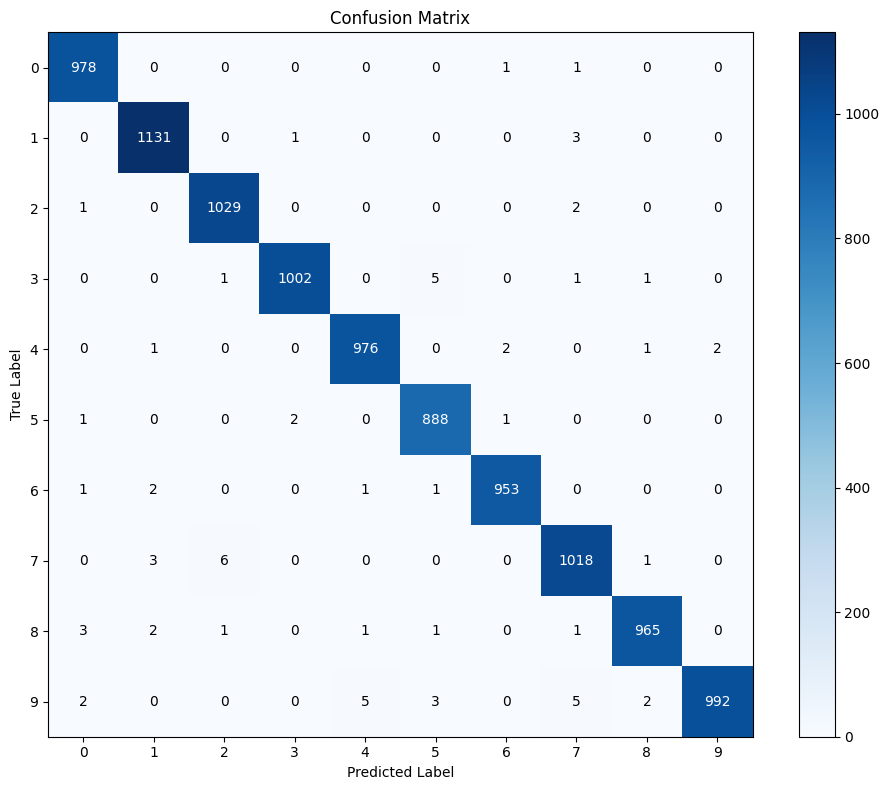

Very_Big_CNN model saved to very_big_cnn_model.pth


In [49]:

# Train the very big CNN model
history_very_big_cnn, trained_very_big_cnn_model = train_and_evaluate_model(
    very_big_cnn_model,
    "Very_Big_CNN",
    learning_rate,
    epochs=epochs,
    batch_size=batch_size,
    device=device
)

MODEL PERFORMANCE SUMMARY:
       Model  Test Accuracy  Test Loss  Avg Epoch Time (s)  Parameters  Accuracy/Param Ratio  Accuracy/Time Ratio
Very Big CNN         0.9932     0.0366              6.1920     3542154                0.2804               0.1604
         CNN         0.9913     0.0333              3.1948      431018                2.2999               0.3103
   Small CNN         0.9913     0.0321              3.2733      220234                4.5011               0.3028
     Big CNN         0.9910     0.0467              3.4990     1025760                0.9661               0.2832
Very Big MLP         0.9830     0.1026              3.1387     3011110                0.3265               0.3132
       wider         0.9805     0.0966              2.5772      235146                4.1697               0.3805
     Big MLP         0.9801     0.0911              3.2824      943946                1.0383               0.2986
Wider Deeper         0.9780     0.1082              3.7016   

c:\Users\saumi\Desktop\CODES\AIML-Project\benckmark.py:83: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(model_names, rotation=45, ha='right')
c:\Users\saumi\Desktop\CODES\AIML-Project\benckmark.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(model_names, rotation=45, ha='right')


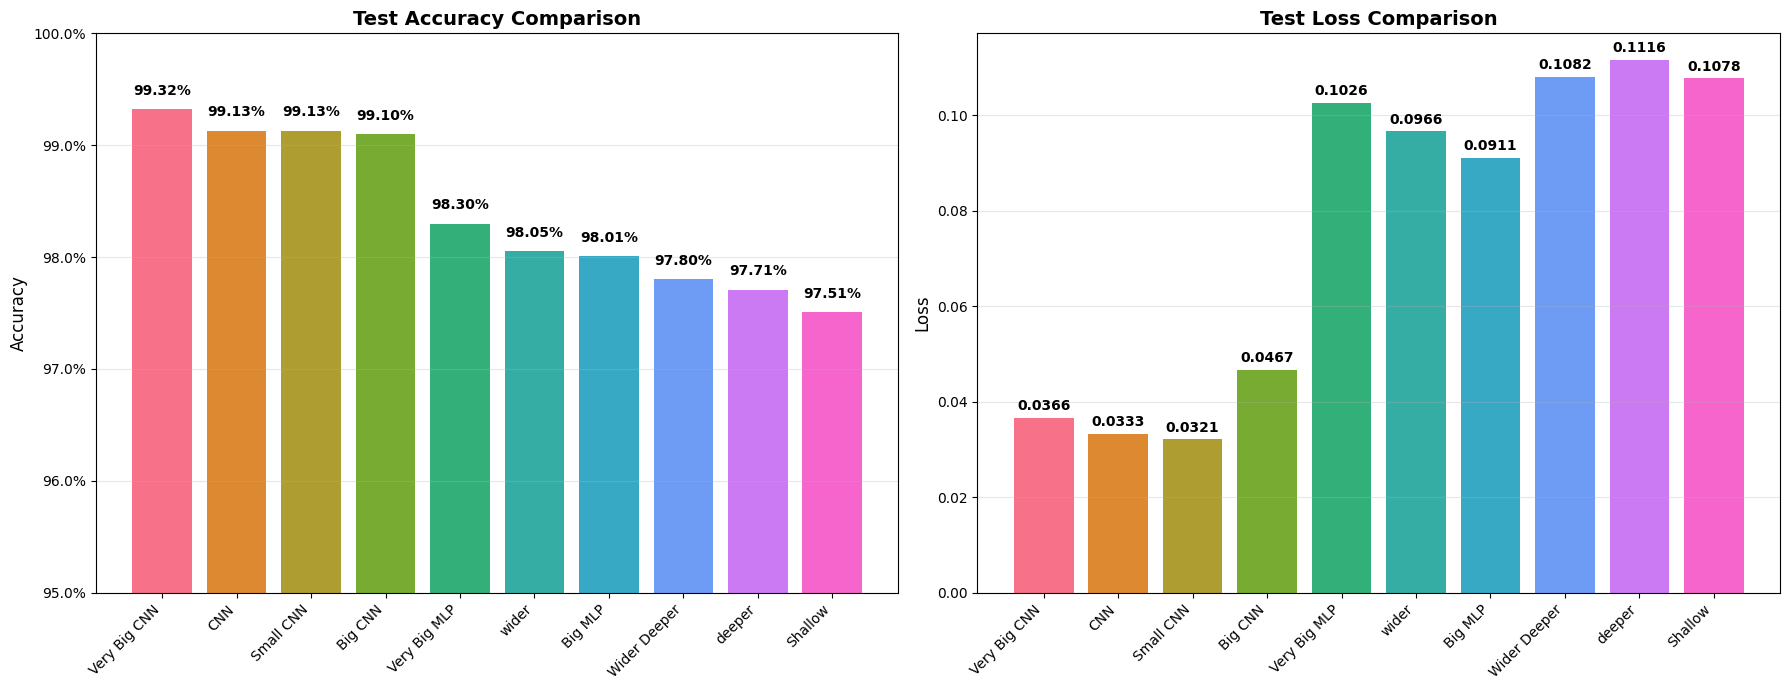

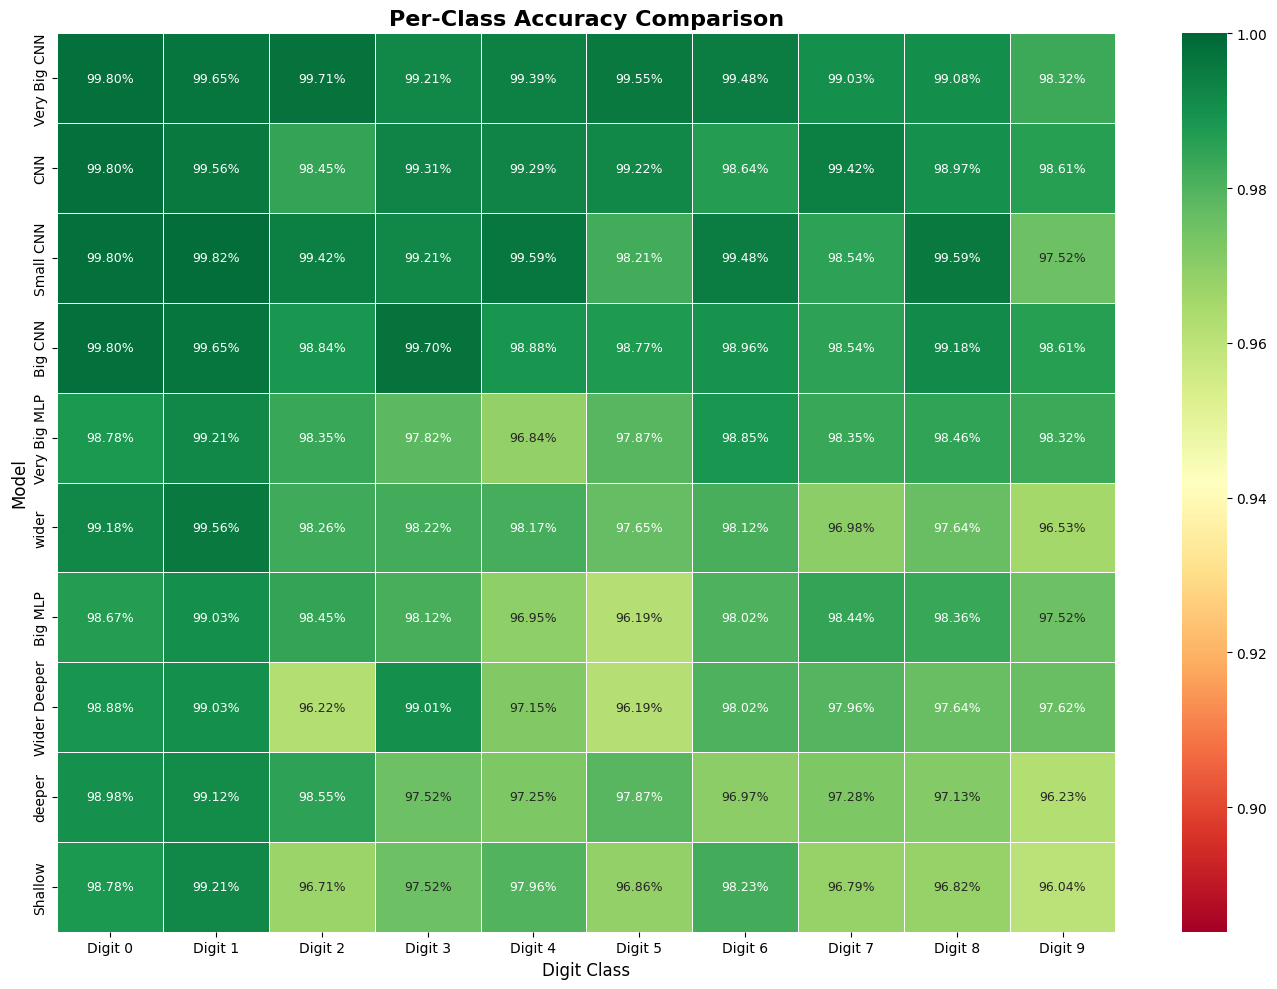

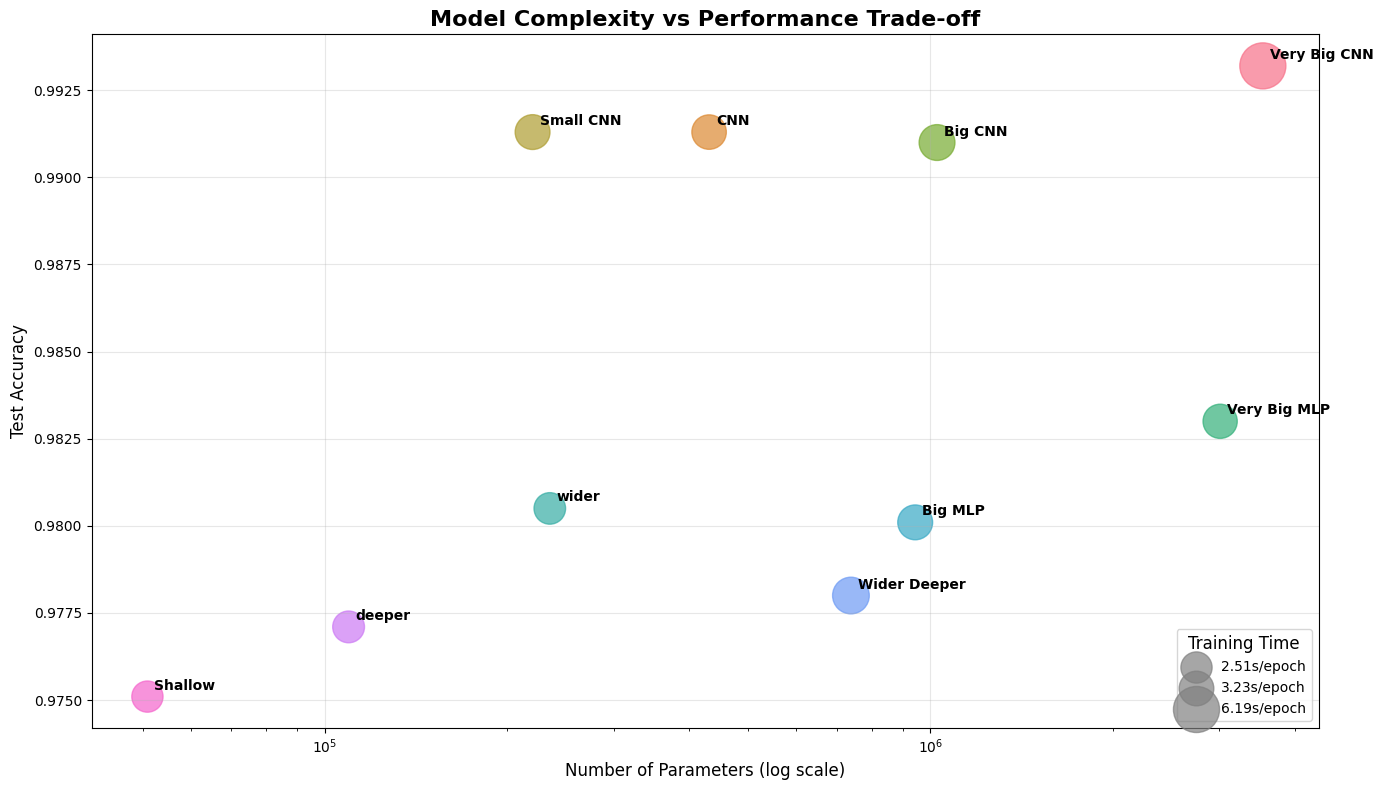

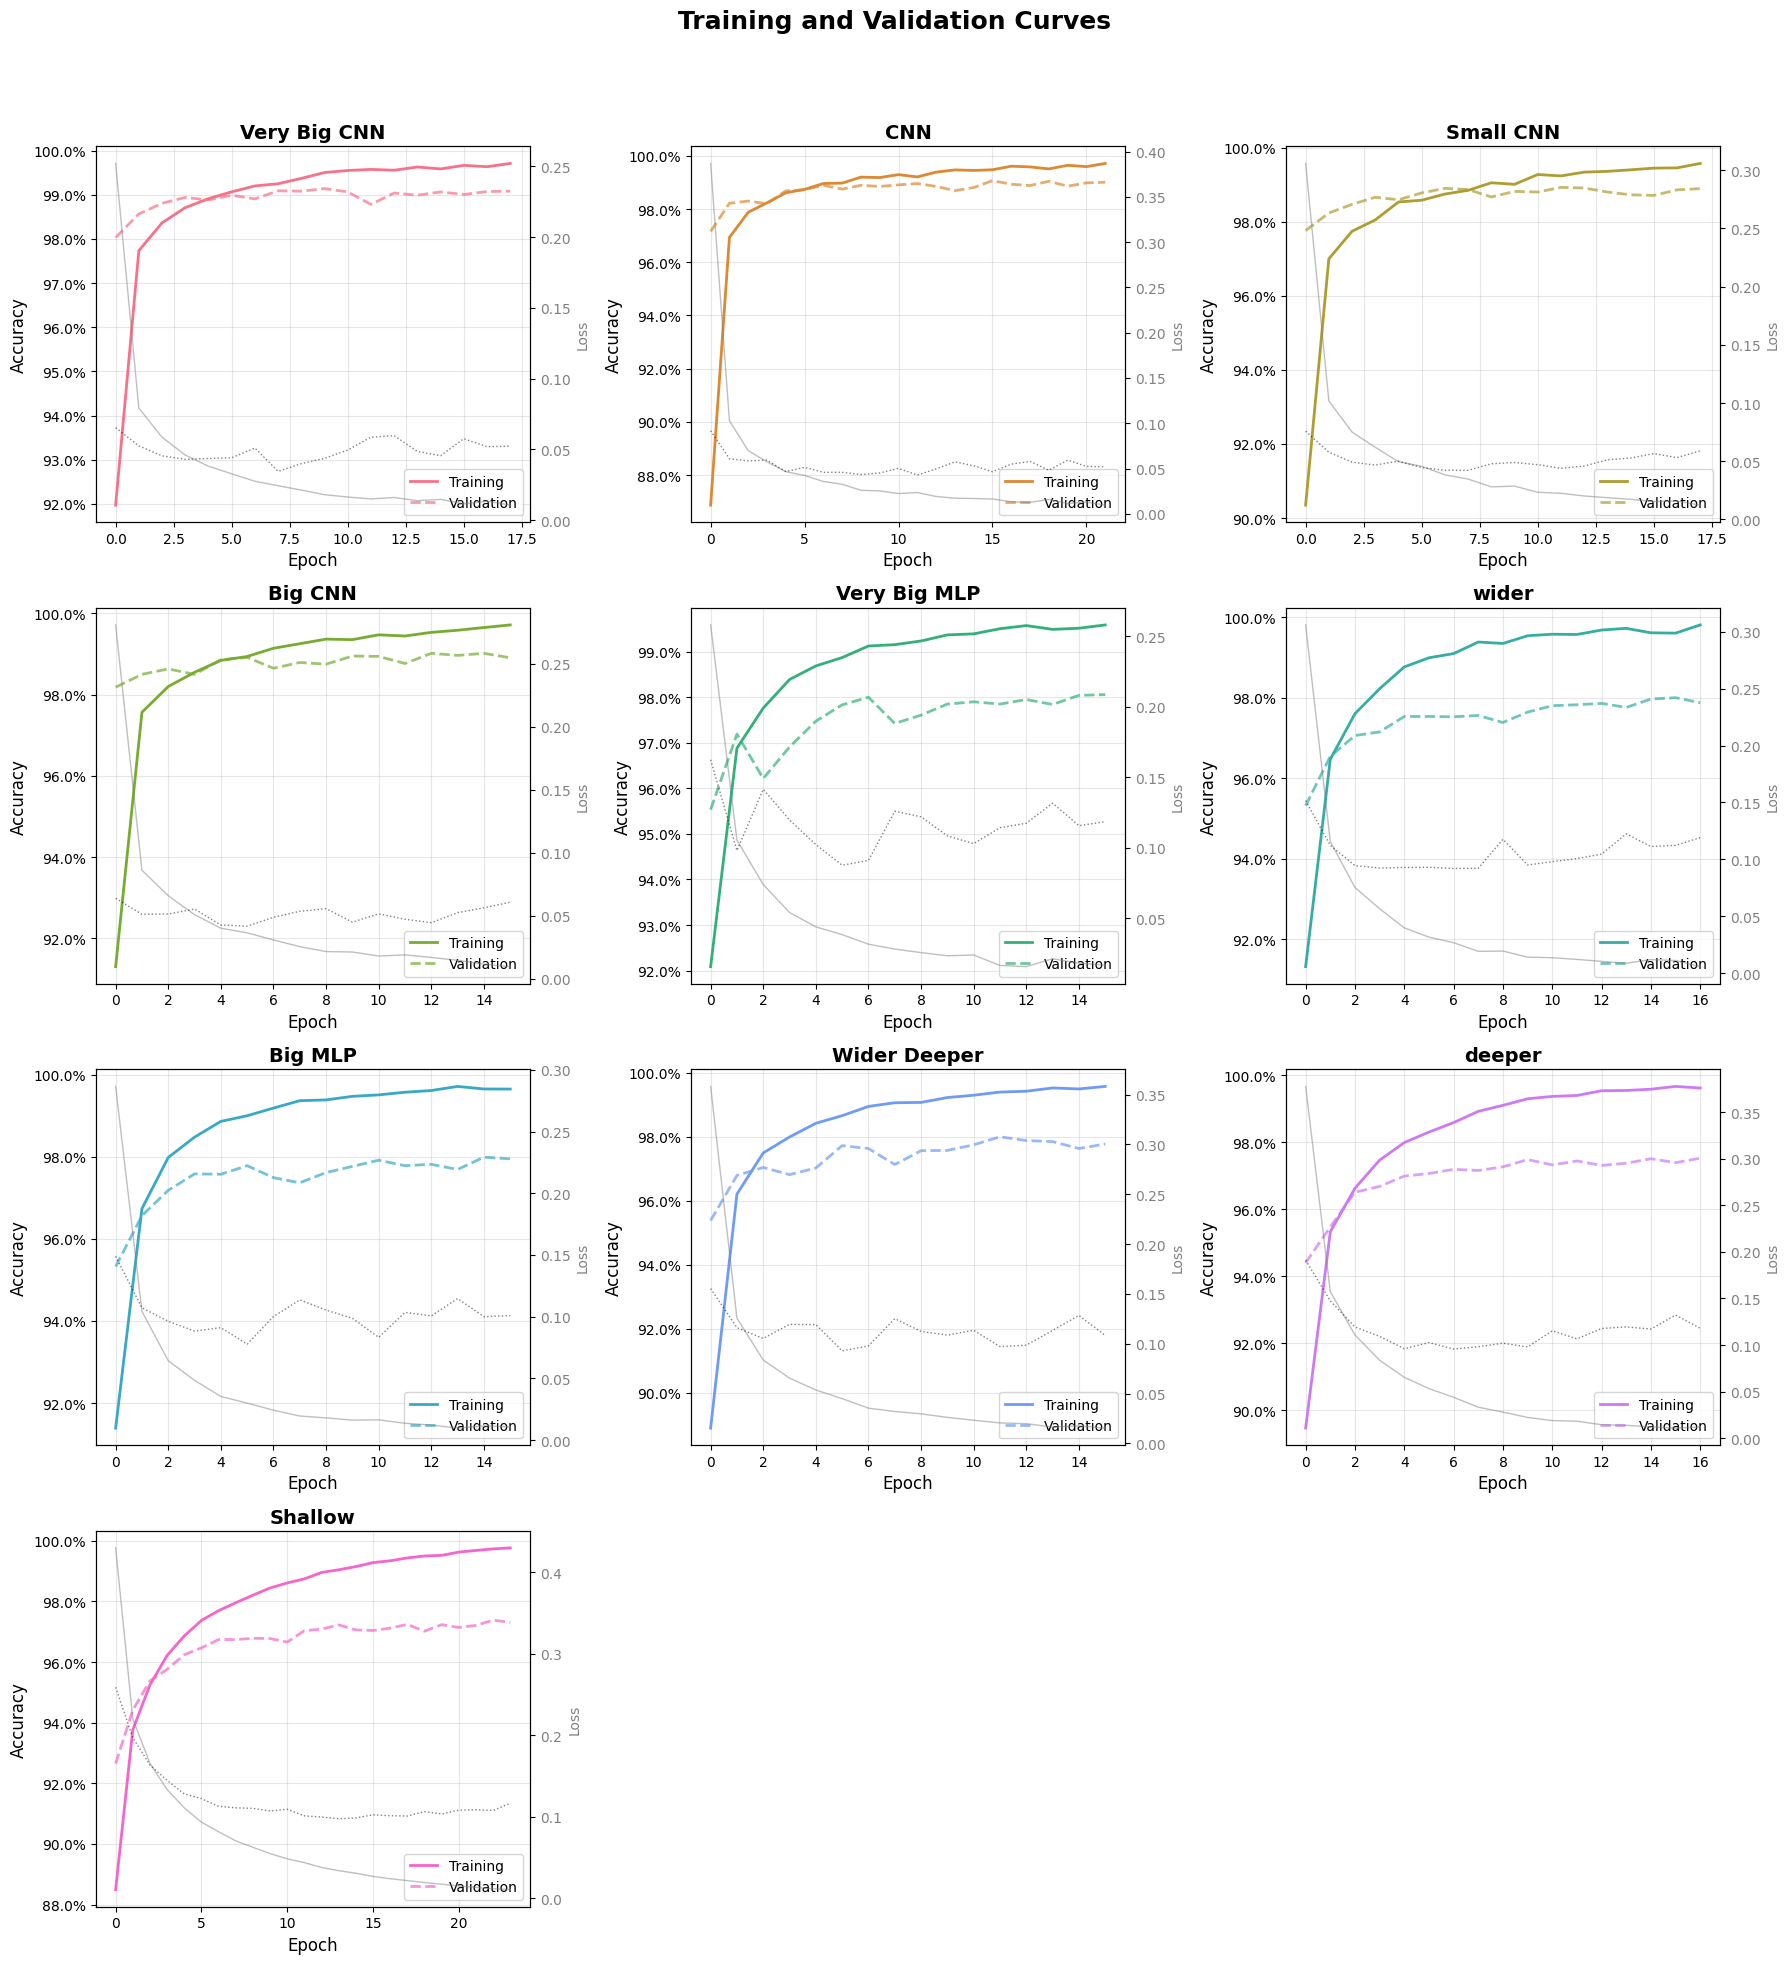

<Figure size 1400x800 with 0 Axes>

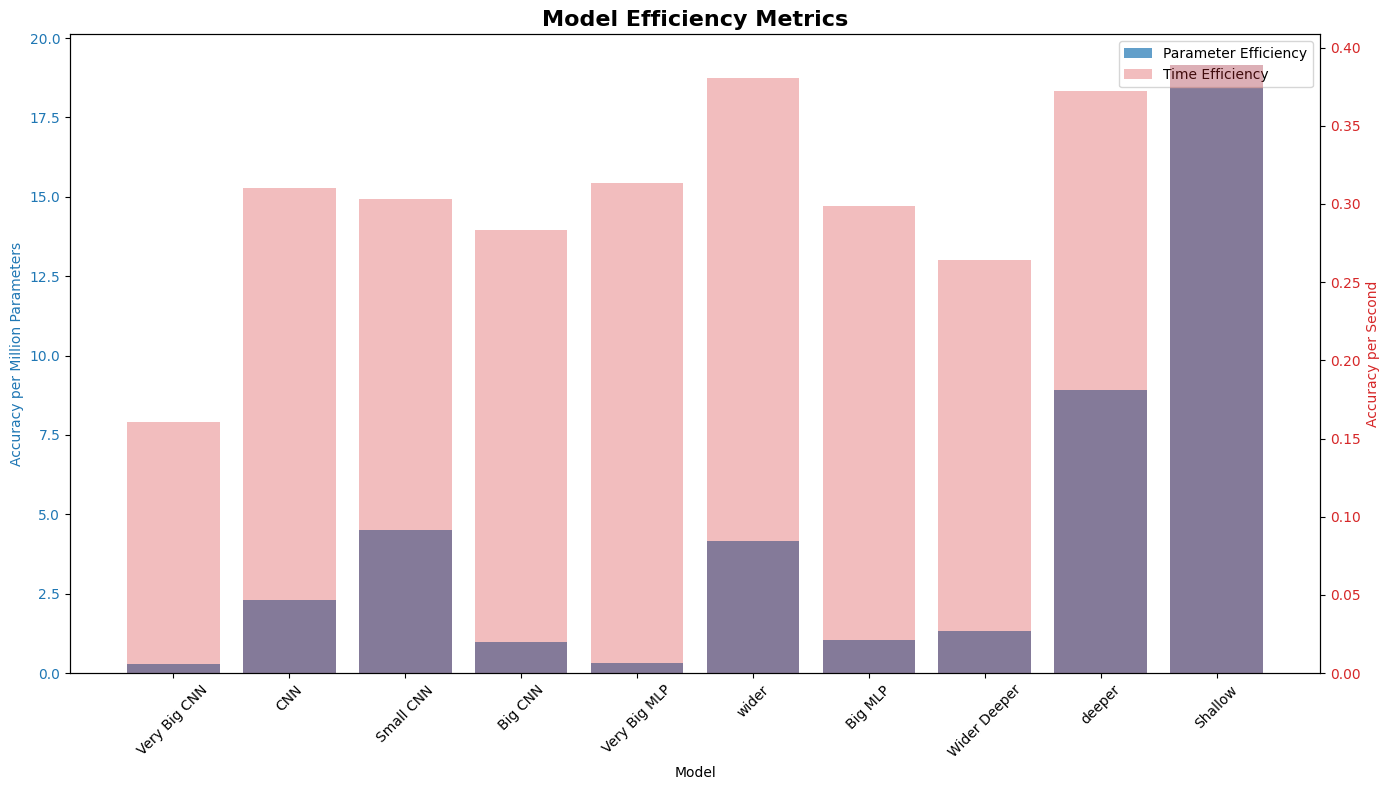

KEY INSIGHTS:
1. Best performing model: Very Big CNN with 99.32% accuracy
2. Most parameter-efficient model: Shallow with 19.1609 accuracy per million parameters
3. Most time-efficient model: Shallow with 0.3890 accuracy per second

4. Per-digit performance analysis:
   - Most challenging digit across all models: Digit 9 (avg accuracy: 97.53%)
   - Easiest digit across all models: Digit 1 (avg accuracy: 99.38%)

   Per-model digit challenges:
   - Shallow: Digit 9 (96.04% accuracy)
   - deeper: Digit 9 (96.23% accuracy)
   - wider: Digit 9 (96.53% accuracy)
   - CNN: Digit 2 (98.45% accuracy)
   - Wider Deeper: Digit 5 (96.19% accuracy)
   - Big MLP: Digit 5 (96.19% accuracy)
   - Very Big MLP: Digit 4 (96.84% accuracy)
   - Small CNN: Digit 9 (97.52% accuracy)
   - Big CNN: Digit 7 (98.54% accuracy)
   - Very Big CNN: Digit 9 (98.32% accuracy)

5. Architecture comparison:
   - CNN models average accuracy: 99.17%
   - MLP models average accuracy: 97.90%
   - Advantage: CNN by 1.27%

6.

In [50]:
from benckmark import analyze_models
analyze_models(model_results)